In [1]:
# Comprehensive Dataset Analysis for Waste Detection
# Dataset: ../../datasets/roboflow_2 (YOLO v11 format)
# Classes: glass, metal, organic, paper, plastic

import os
import sys
from pathlib import Path
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random
from collections import defaultdict, Counter
import yaml
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Dataset configuration
DATASET_DIR = Path("../../datasets/roboflow_2")
FOLDERS = ['train', 'valid', 'test']
CLASS_NAMES = ['glass', 'metal', 'organic', 'paper', 'plastic']
COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

print("🗂️  Dataset Analysis Setup Complete")
print(f"📁 Dataset Directory: {DATASET_DIR}")
print(f"📊 Classes: {CLASS_NAMES}")
print(f"🔄 Splits: {FOLDERS}")

🗂️  Dataset Analysis Setup Complete
📁 Dataset Directory: ../../datasets/roboflow_2
📊 Classes: ['glass', 'metal', 'organic', 'paper', 'plastic']
🔄 Splits: ['train', 'valid', 'test']


🚀 Starting Comprehensive Dataset Analysis...
🧹 DATA CLEANING ANALYSIS

📁 TRAIN Split:
   📸 Images: 11466
   🏷️  Labels: 11466
   ❌ Missing labels: 0
   ❌ Missing images: 0
   📄 Empty labels: 0
   💀 Corrupted images: 0

📁 TRAIN Split:
   📸 Images: 11466
   🏷️  Labels: 11466
   ❌ Missing labels: 0
   ❌ Missing images: 0
   📄 Empty labels: 0
   💀 Corrupted images: 0

📁 VALID Split:
   📸 Images: 1092
   🏷️  Labels: 1092
   ❌ Missing labels: 0
   ❌ Missing images: 0
   📄 Empty labels: 0
   💀 Corrupted images: 0

📁 TEST Split:
   📸 Images: 546
   🏷️  Labels: 546
   ❌ Missing labels: 0
   ❌ Missing images: 0
   📄 Empty labels: 0
   💀 Corrupted images: 0

📊 OVERALL SUMMARY:
   📸 Total Images: 13104
   🏷️  Total Labels: 13104
   ❌ Total Missing Labels: 0
   ❌ Total Missing Images: 0
   📄 Total Empty Labels: 0
   💀 Total Corrupted Images: 0


📊 DATA PREPROCESSING ANALYSIS

🔍 Analyzing train split...

📁 VALID Split:
   📸 Images: 1092
   🏷️  Labels: 1092
   ❌ Missing labels: 0
   ❌ Missing images:

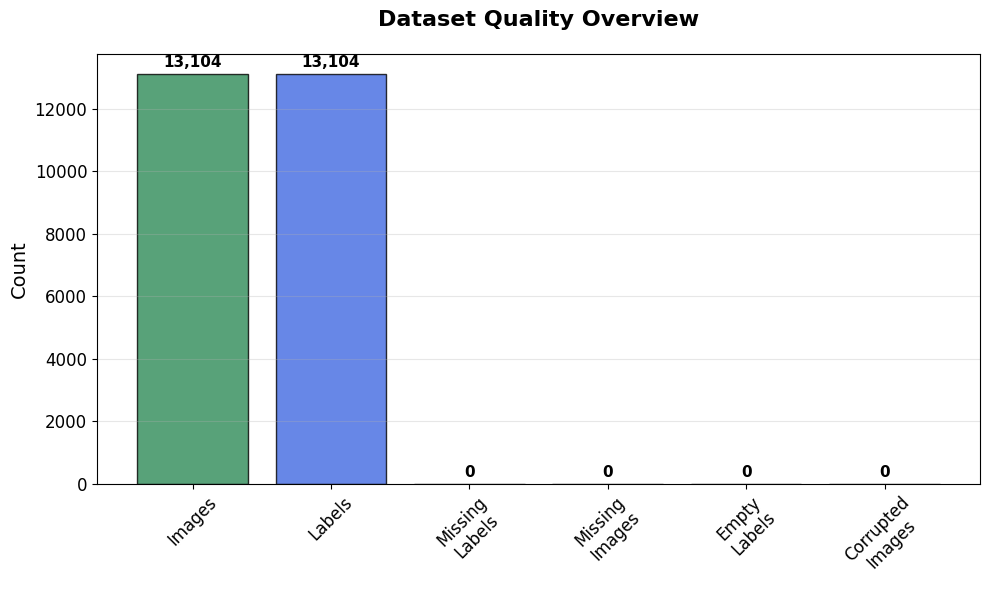

📊 Creating Figure 2: Annotations per Split


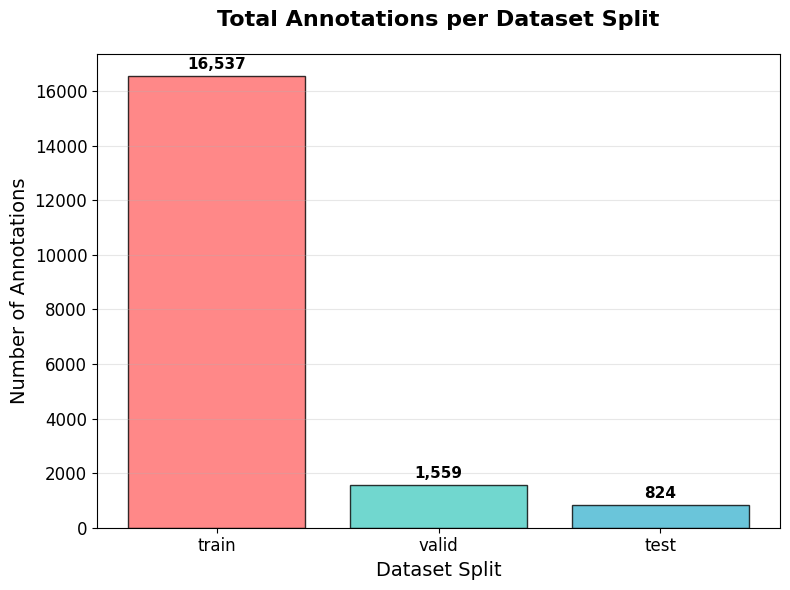

📊 Creating Figure 3: Class Distribution Heatmap


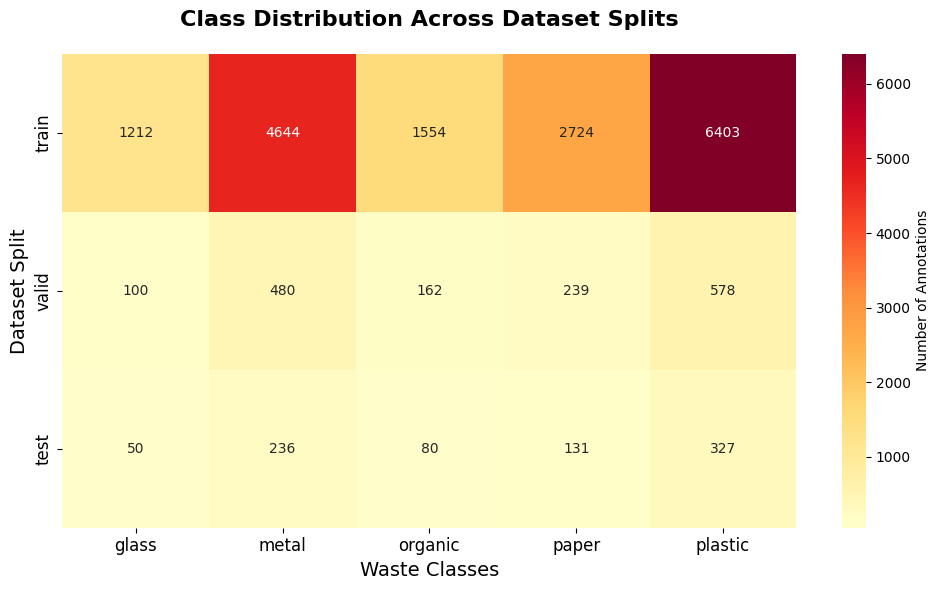

📊 Creating Figure 4: Overall Class Distribution


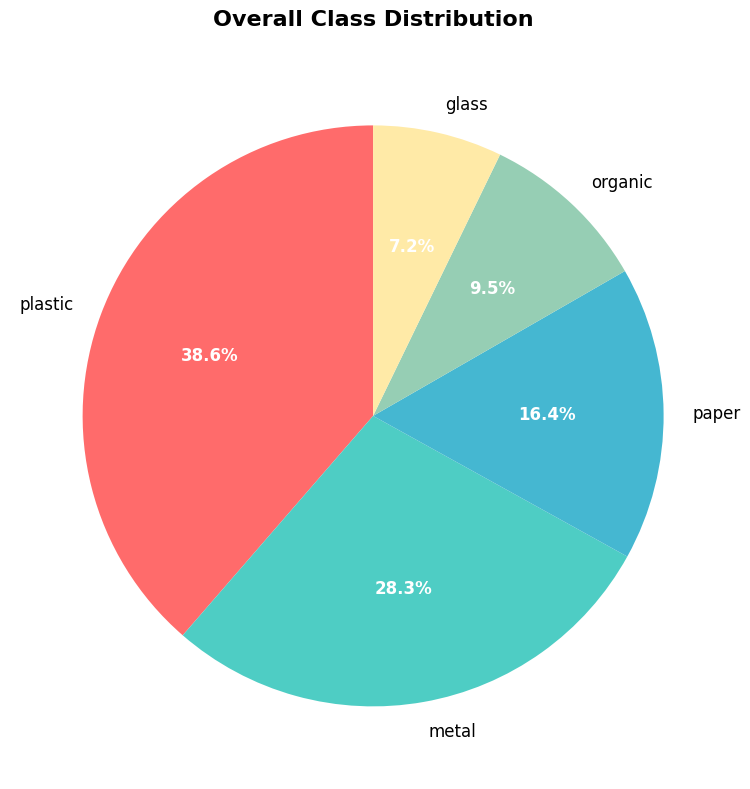

📊 Creating Figure 5: Annotations per Image Distribution


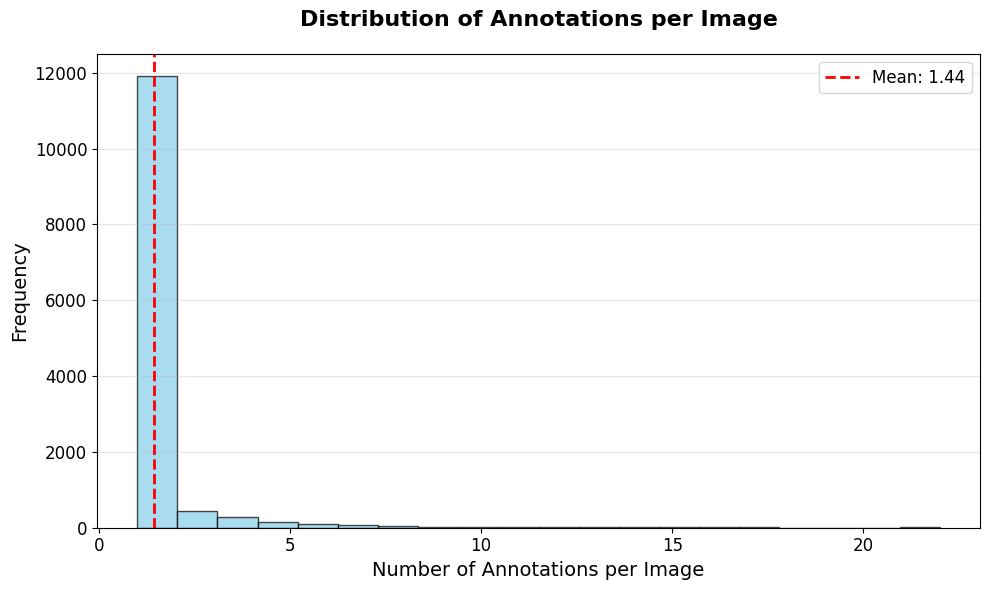

📊 Creating Figure 6: Bounding Box Area Distribution


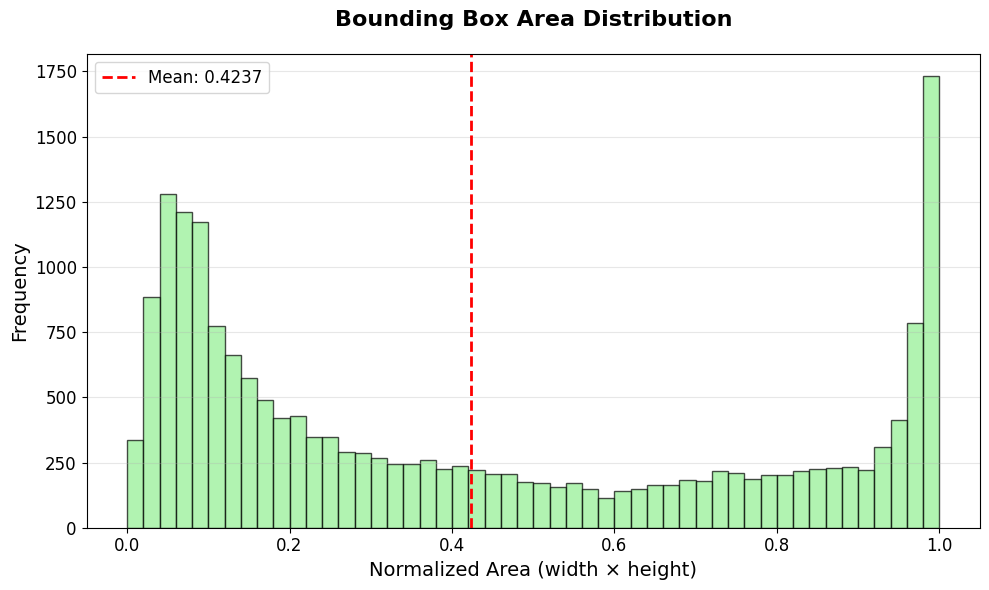

📊 Creating Figure 7: Aspect Ratio Distribution


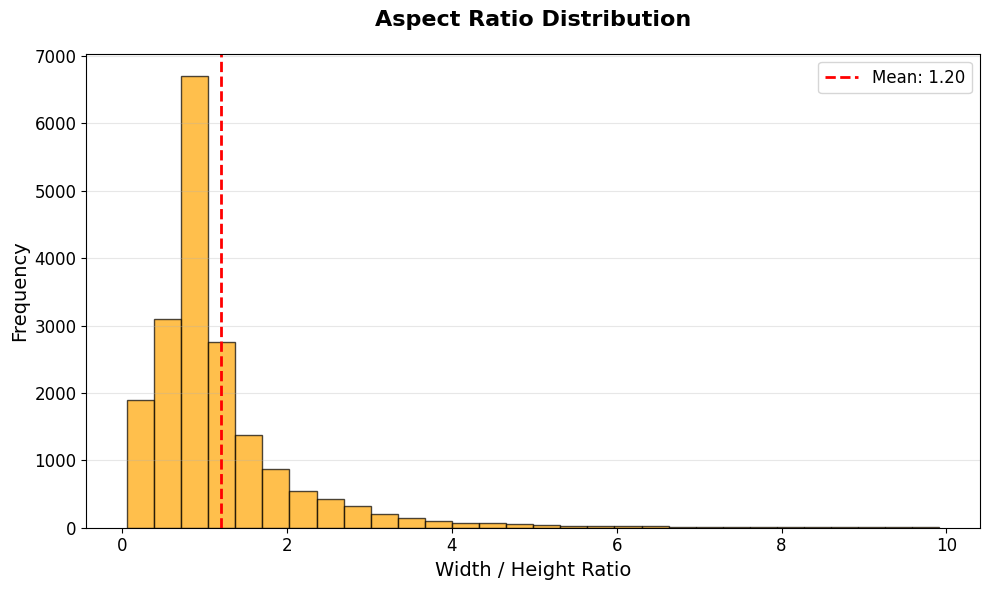

📊 Creating Figure 8: Object Center Distribution


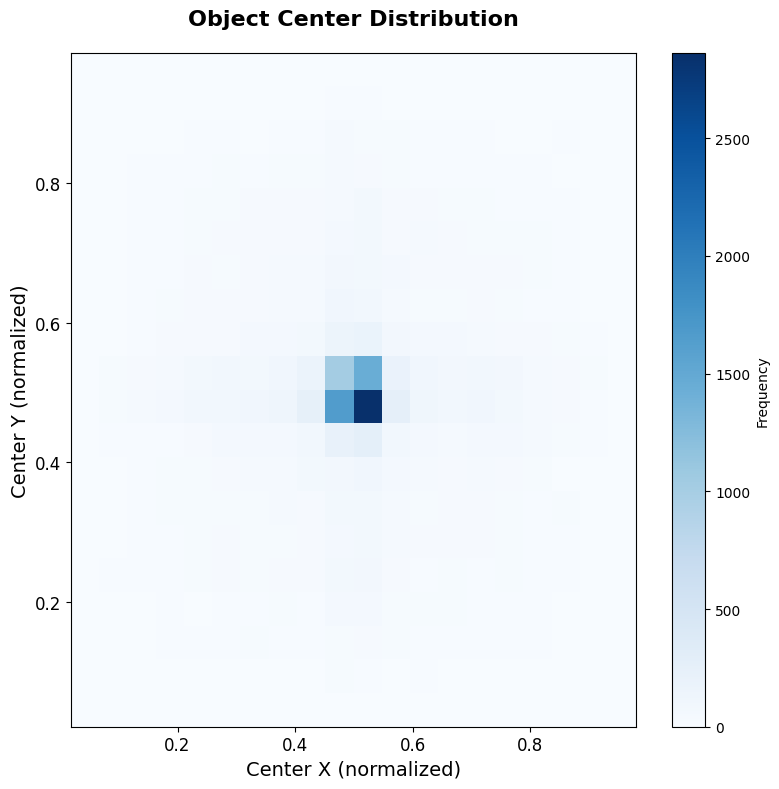

📊 Creating Figure 9: Image Size Distribution


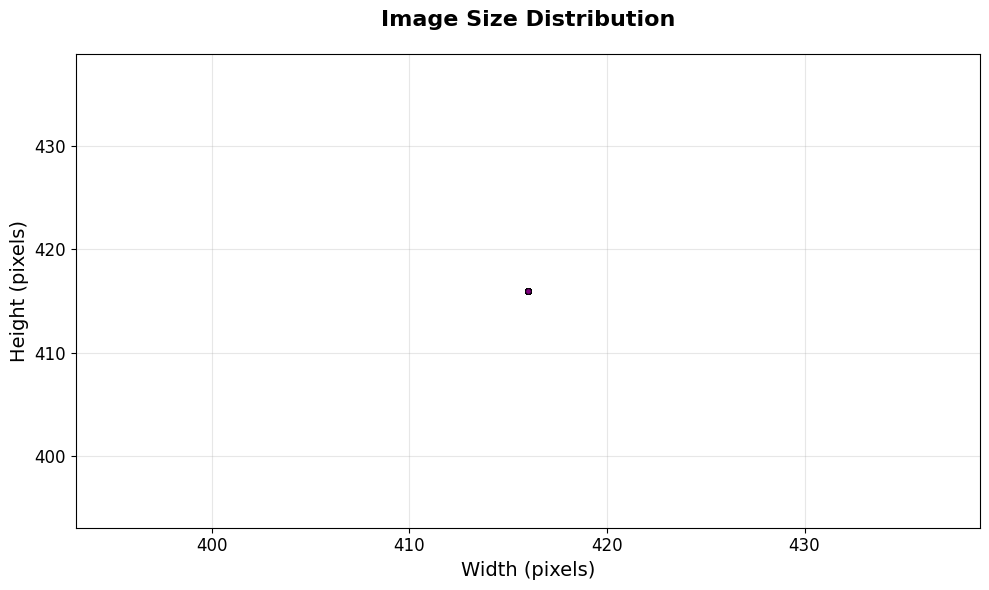

📊 Creating Figure 10: Unique Images per Class


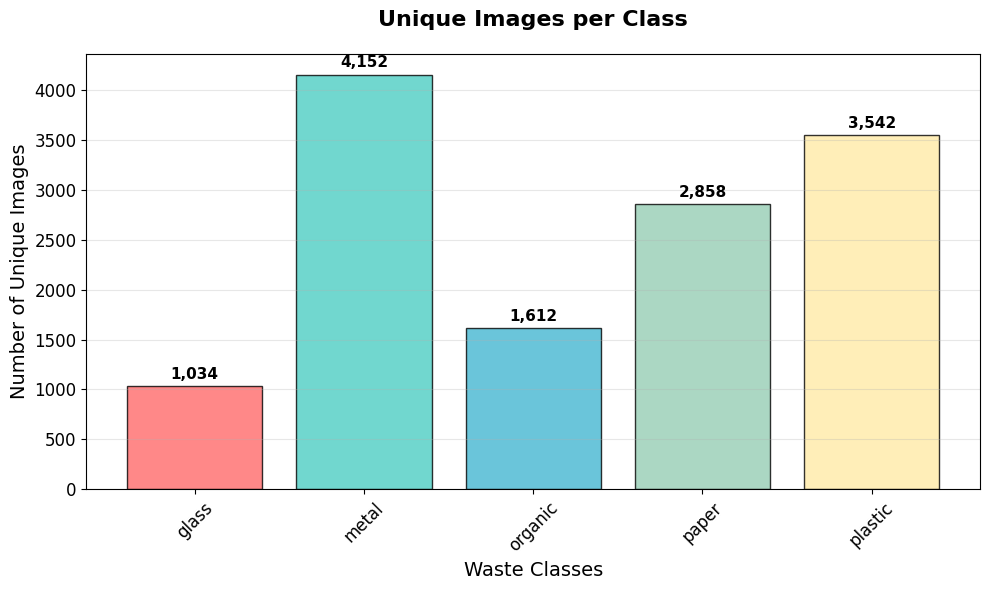

📊 Creating Figure 11: Dataset Split Proportions


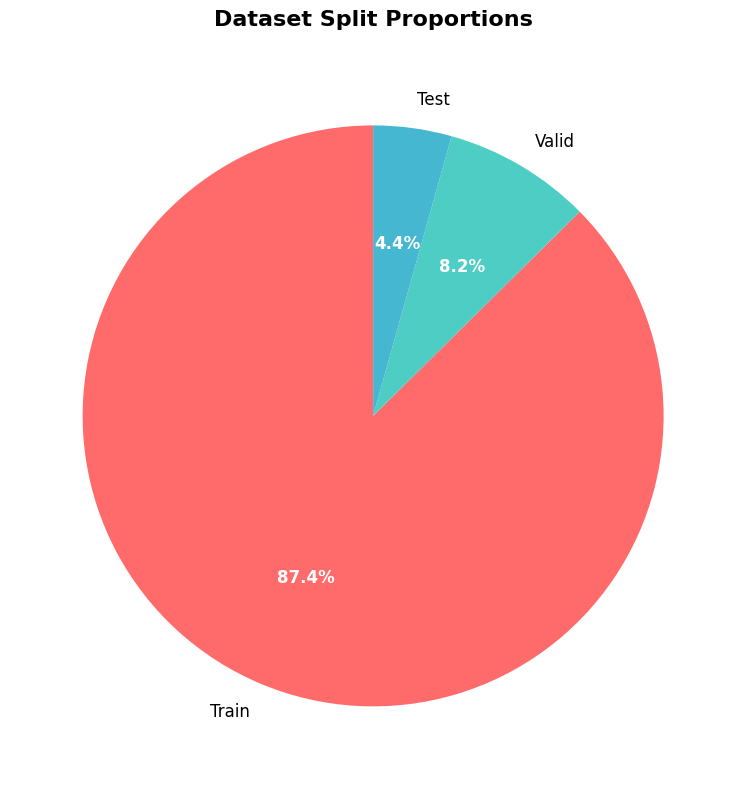

📊 Creating Figure 12: Class Balance Analysis


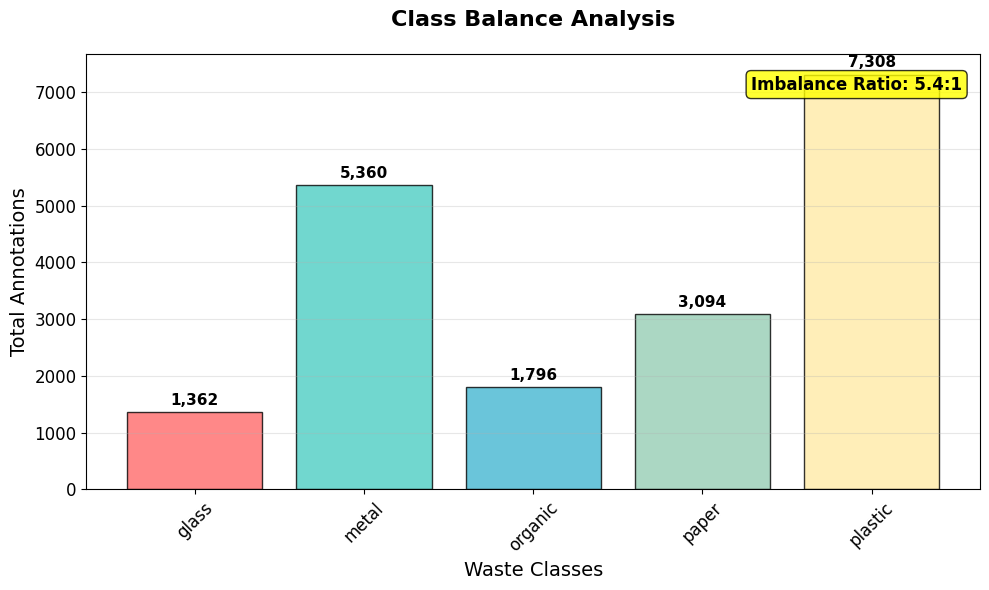


✅ Created 12 individual figures
💾 To save figures for your paper, use:
   fig.savefig('filename.png', dpi=300, bbox_inches='tight')
   fig.savefig('filename.pdf', bbox_inches='tight')  # For vector graphics


🎯 DATASET QUALITY ASSESSMENT
📊 QUANTITATIVE METRICS:
   🖼️  Total Images: 13,104
   🏷️  Total Annotations: 18,920
   📍 Avg Annotations/Image: 1.44
   ⚖️  Class Imbalance Ratio: 5.4:1
   🎯 Data Integrity Score: 100.0%
   📏 Object Size Variability: 0.3530
   📐 Aspect Ratio Variability: 0.9846

🔍 QUALITATIVE ASSESSMENT:
   ✅ Dataset Size: GOOD (≥1000 images)
   ⚠️  Class Balance: MODERATE (3:1-10:1 ratio)
   ✅ Data Integrity: EXCELLENT (≥90%)
   ⚠️  Annotation Density: MODERATE (1-2 objects/image)
   ✅ Object Size Variability: HIGH (good diversity)

🏆 OVERALL DATASET QUALITY:
   Score: 85.0/100 - 🏆 EXCELLENT
   📝 Recommendation: This dataset is well-suited for training robust waste detection models!

✅ Analysis Complete!

💡 RECOMMENDATIONS:
   1. Review any missing or corrupted file

In [2]:
# =====================================================
# 1. DATA CLEANING ANALYSIS
# =====================================================

def analyze_data_integrity(dataset_dir):
    """Comprehensive data cleaning analysis"""
    print("🧹 DATA CLEANING ANALYSIS")
    print("=" * 50)
    
    results = {
        'missing_labels': {},
        'missing_images': {},
        'empty_labels': {},
        'corrupted_images': {},
        'mismatched_names': {},
        'summary': {}
    }
    
    total_images = 0
    total_labels = 0
    
    for split in FOLDERS:
        split_path = dataset_dir / split
        if not split_path.exists():
            print(f"❌ Split '{split}' not found!")
            continue
            
        images_path = split_path / 'images'
        labels_path = split_path / 'labels'
        
        # Get file lists
        if images_path.exists():
            image_files = set([f.stem for f in images_path.glob('*')])
        else:
            image_files = set()
            
        if labels_path.exists():
            label_files = set([f.stem for f in labels_path.glob('*.txt')])
        else:
            label_files = set()
            
        # Find missing files
        missing_labels = image_files - label_files
        missing_images = label_files - image_files
        
        results['missing_labels'][split] = list(missing_labels)
        results['missing_images'][split] = list(missing_images)
        
        # Check for empty label files
        empty_labels = []
        if labels_path.exists():
            for label_file in labels_path.glob('*.txt'):
                if label_file.stat().st_size == 0:
                    empty_labels.append(label_file.stem)
        results['empty_labels'][split] = empty_labels
        
        # Check for corrupted images
        corrupted_images = []
        if images_path.exists():
            for img_file in list(images_path.glob('*'))[:50]:  # Sample check
                try:
                    img = cv2.imread(str(img_file))
                    if img is None:
                        corrupted_images.append(img_file.name)
                except:
                    corrupted_images.append(img_file.name)
        results['corrupted_images'][split] = corrupted_images
        
        # Count totals
        total_images += len(image_files)
        total_labels += len(label_files)
        
        # Print split summary
        print(f"\n📁 {split.upper()} Split:")
        print(f"   📸 Images: {len(image_files)}")
        print(f"   🏷️  Labels: {len(label_files)}")
        print(f"   ❌ Missing labels: {len(missing_labels)}")
        print(f"   ❌ Missing images: {len(missing_images)}")
        print(f"   📄 Empty labels: {len(empty_labels)}")
        print(f"   💀 Corrupted images: {len(corrupted_images)}")
    
    results['summary'] = {
        'total_images': total_images,
        'total_labels': total_labels,
        'total_missing_labels': sum(len(v) for v in results['missing_labels'].values()),
        'total_missing_images': sum(len(v) for v in results['missing_images'].values()),
        'total_empty_labels': sum(len(v) for v in results['empty_labels'].values()),
        'total_corrupted_images': sum(len(v) for v in results['corrupted_images'].values())
    }
    
    # Overall summary
    print(f"\n📊 OVERALL SUMMARY:")
    print(f"   📸 Total Images: {results['summary']['total_images']}")
    print(f"   🏷️  Total Labels: {results['summary']['total_labels']}")
    print(f"   ❌ Total Missing Labels: {results['summary']['total_missing_labels']}")
    print(f"   ❌ Total Missing Images: {results['summary']['total_missing_images']}")
    print(f"   📄 Total Empty Labels: {results['summary']['total_empty_labels']}")
    print(f"   💀 Total Corrupted Images: {results['summary']['total_corrupted_images']}")
    
    return results

# =====================================================
# 2. DATA PREPROCESSING ANALYSIS
# =====================================================

def analyze_annotations_and_distribution(dataset_dir):
    """Analyze annotation statistics and class distribution"""
    print("\n\n📊 DATA PREPROCESSING ANALYSIS")
    print("=" * 50)
    
    stats = {
        'class_distribution': {split: Counter() for split in FOLDERS},
        'bbox_stats': {split: {'areas': [], 'aspect_ratios': [], 'centers_x': [], 'centers_y': []} for split in FOLDERS},
        'images_per_class': {split: {cls: set() for cls in CLASS_NAMES} for split in FOLDERS},
        'annotations_per_image': {split: [] for split in FOLDERS},
        'image_sizes': {split: [] for split in FOLDERS}
    }
    
    for split in FOLDERS:
        split_path = dataset_dir / split
        labels_path = split_path / 'labels'
        images_path = split_path / 'images'
        
        if not labels_path.exists() or not images_path.exists():
            continue
            
        print(f"\n🔍 Analyzing {split} split...")
        
        # Process each label file
        for label_file in labels_path.glob('*.txt'):
            img_file_candidates = list(images_path.glob(f"{label_file.stem}.*"))
            
            if not img_file_candidates:
                continue
                
            img_file = img_file_candidates[0]
            
            # Get image dimensions
            try:
                img = cv2.imread(str(img_file))
                if img is not None:
                    h, w = img.shape[:2]
                    stats['image_sizes'][split].append((w, h))
                else:
                    continue
            except:
                continue
            
            # Read annotations
            annotations = []
            try:
                with open(label_file, 'r') as f:
                    lines = f.read().strip().split('\n')
                    if lines[0]:  # Not empty
                        for line in lines:
                            if line.strip():
                                parts = line.strip().split()
                                if len(parts) == 5:
                                    class_id = int(parts[0])
                                    center_x, center_y, width, height = map(float, parts[1:])
                                    annotations.append((class_id, center_x, center_y, width, height))
            except:
                continue
            
            stats['annotations_per_image'][split].append(len(annotations))
            
            # Process each annotation
            for class_id, center_x, center_y, width, height in annotations:
                if 0 <= class_id < len(CLASS_NAMES):
                    class_name = CLASS_NAMES[class_id]
                    stats['class_distribution'][split][class_name] += 1
                    stats['images_per_class'][split][class_name].add(label_file.stem)
                    
                    # Bbox statistics
                    area = width * height
                    aspect_ratio = width / height if height > 0 else 0
                    
                    stats['bbox_stats'][split]['areas'].append(area)
                    stats['bbox_stats'][split]['aspect_ratios'].append(aspect_ratio)
                    stats['bbox_stats'][split]['centers_x'].append(center_x)
                    stats['bbox_stats'][split]['centers_y'].append(center_y)
    
    return stats

def create_individual_visualizations(stats, cleaning_results):
    """Create individual visualizations as separate figures for paper publication"""
    print("\n\n📈 CREATING INDIVIDUAL VISUALIZATIONS")
    print("=" * 50)
    
    figures = {}
    
    # 1. Data Quality Overview
    print("📊 Creating Figure 1: Data Quality Overview")
    fig1, ax = plt.subplots(figsize=(10, 6))
    quality_data = [
        cleaning_results['summary']['total_images'],
        cleaning_results['summary']['total_labels'],
        cleaning_results['summary']['total_missing_labels'],
        cleaning_results['summary']['total_missing_images'],
        cleaning_results['summary']['total_empty_labels'],
        cleaning_results['summary']['total_corrupted_images']
    ]
    quality_labels = ['Images', 'Labels', 'Missing\nLabels', 'Missing\nImages', 'Empty\nLabels', 'Corrupted\nImages']
    colors = ['#2E8B57', '#4169E1', '#FF8C00', '#DC143C', '#9932CC', '#8B4513']
    bars = ax.bar(quality_labels, quality_data, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax.set_title('Dataset Quality Overview', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(quality_data)*0.01,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    figures['data_quality'] = fig1
    plt.show()
    
    # 2. Total Annotations per Split
    print("📊 Creating Figure 2: Annotations per Split")
    fig2, ax = plt.subplots(figsize=(8, 6))
    split_totals = {}
    for split in FOLDERS:
        split_totals[split] = sum(stats['class_distribution'][split].values())
    
    bars = ax.bar(split_totals.keys(), split_totals.values(), color=COLORS[:len(FOLDERS)], 
                  alpha=0.8, edgecolor='black', linewidth=1)
    ax.set_title('Total Annotations per Dataset Split', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Number of Annotations', fontsize=14)
    ax.set_xlabel('Dataset Split', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (split, count) in enumerate(split_totals.items()):
        ax.text(i, count + max(split_totals.values())*0.01, f'{count:,}', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    figures['annotations_per_split'] = fig2
    plt.show()
    
    # 3. Class Distribution Heatmap
    print("📊 Creating Figure 3: Class Distribution Heatmap")
    fig3, ax = plt.subplots(figsize=(10, 6))
    class_matrix = []
    for split in FOLDERS:
        row = []
        for class_name in CLASS_NAMES:
            count = stats['class_distribution'][split].get(class_name, 0)
            row.append(count)
        class_matrix.append(row)
    
    class_df = pd.DataFrame(class_matrix, index=FOLDERS, columns=CLASS_NAMES)
    im = sns.heatmap(class_df, annot=True, fmt='d', cmap='YlOrRd', ax=ax, 
                     cbar_kws={'label': 'Number of Annotations'})
    ax.set_title('Class Distribution Across Dataset Splits', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Dataset Split', fontsize=14)
    ax.set_xlabel('Waste Classes', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    figures['class_heatmap'] = fig3
    plt.show()
    
    # 4. Overall Class Distribution Pie Chart
    print("📊 Creating Figure 4: Overall Class Distribution")
    fig4, ax = plt.subplots(figsize=(8, 8))
    total_class_counts = Counter()
    for split in FOLDERS:
        for class_name, count in stats['class_distribution'][split].items():
            total_class_counts[class_name] += count
    
    if total_class_counts:
        wedges, texts, autotexts = ax.pie(total_class_counts.values(), labels=total_class_counts.keys(), 
                                          autopct='%1.1f%%', colors=COLORS, startangle=90,
                                          textprops={'fontsize': 12})
        ax.set_title('Overall Class Distribution', fontsize=16, fontweight='bold', pad=20)
        
        # Make percentage text bold
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    plt.tight_layout()
    figures['class_distribution'] = fig4
    plt.show()
    
    # 5. Annotations per Image Distribution
    print("📊 Creating Figure 5: Annotations per Image Distribution")
    fig5, ax = plt.subplots(figsize=(10, 6))
    all_anns_per_img = []
    for split in FOLDERS:
        all_anns_per_img.extend(stats['annotations_per_image'][split])
    
    if all_anns_per_img:
        ax.hist(all_anns_per_img, bins=20, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1)
        ax.set_title('Distribution of Annotations per Image', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Number of Annotations per Image', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.axvline(np.mean(all_anns_per_img), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(all_anns_per_img):.2f}')
        ax.legend(fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    figures['annotations_per_image'] = fig5
    plt.show()
    
    # 6. Bounding Box Area Distribution
    print("📊 Creating Figure 6: Bounding Box Area Distribution")
    fig6, ax = plt.subplots(figsize=(10, 6))
    all_areas = []
    for split in FOLDERS:
        all_areas.extend(stats['bbox_stats'][split]['areas'])
    
    if all_areas:
        ax.hist(all_areas, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', linewidth=1)
        ax.set_title('Bounding Box Area Distribution', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Normalized Area (width × height)', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.axvline(np.mean(all_areas), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(all_areas):.4f}')
        ax.legend(fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    figures['bbox_areas'] = fig6
    plt.show()
    
    # 7. Aspect Ratio Distribution
    print("📊 Creating Figure 7: Aspect Ratio Distribution")
    fig7, ax = plt.subplots(figsize=(10, 6))
    all_ratios = []
    for split in FOLDERS:
        all_ratios.extend([r for r in stats['bbox_stats'][split]['aspect_ratios'] if 0 < r < 10])
    
    if all_ratios:
        ax.hist(all_ratios, bins=30, alpha=0.7, color='orange', edgecolor='black', linewidth=1)
        ax.set_title('Aspect Ratio Distribution', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Width / Height Ratio', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.axvline(np.mean(all_ratios), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(all_ratios):.2f}')
        ax.legend(fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    figures['aspect_ratios'] = fig7
    plt.show()
    
    # 8. Object Center Distribution Heatmap
    print("📊 Creating Figure 8: Object Center Distribution")
    fig8, ax = plt.subplots(figsize=(8, 8))
    all_centers_x = []
    all_centers_y = []
    for split in FOLDERS:
        all_centers_x.extend(stats['bbox_stats'][split]['centers_x'])
        all_centers_y.extend(stats['bbox_stats'][split]['centers_y'])
    
    if all_centers_x and all_centers_y:
        hist = ax.hist2d(all_centers_x, all_centers_y, bins=20, cmap='Blues')
        plt.colorbar(hist[3], ax=ax, label='Frequency')
        ax.set_title('Object Center Distribution', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Center X (normalized)', fontsize=14)
        ax.set_ylabel('Center Y (normalized)', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    figures['object_centers'] = fig8
    plt.show()
    
    # 9. Image Size Distribution
    print("📊 Creating Figure 9: Image Size Distribution")
    fig9, ax = plt.subplots(figsize=(10, 6))
    all_widths = []
    all_heights = []
    for split in FOLDERS:
        for w, h in stats['image_sizes'][split]:
            all_widths.append(w)
            all_heights.append(h)
    
    if all_widths and all_heights:
        ax.scatter(all_widths, all_heights, alpha=0.6, s=15, c='purple', edgecolors='black', linewidth=0.5)
        ax.set_title('Image Size Distribution', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Width (pixels)', fontsize=14)
        ax.set_ylabel('Height (pixels)', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', labelsize=12)
    
    plt.tight_layout()
    figures['image_sizes'] = fig9
    plt.show()
    
    # 10. Unique Images per Class
    print("📊 Creating Figure 10: Unique Images per Class")
    fig10, ax = plt.subplots(figsize=(10, 6))
    unique_images_per_class = {}
    for class_name in CLASS_NAMES:
        unique_images = set()
        for split in FOLDERS:
            unique_images.update(stats['images_per_class'][split][class_name])
        unique_images_per_class[class_name] = len(unique_images)
    
    bars = ax.bar(unique_images_per_class.keys(), unique_images_per_class.values(), 
                  color=COLORS, alpha=0.8, edgecolor='black', linewidth=1)
    ax.set_title('Unique Images per Class', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Number of Unique Images', fontsize=14)
    ax.set_xlabel('Waste Classes', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (class_name, count) in enumerate(unique_images_per_class.items()):
        ax.text(i, count + max(unique_images_per_class.values())*0.01, f'{count:,}', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    figures['unique_images_per_class'] = fig10
    plt.show()
    
    # 11. Dataset Split Proportions
    print("📊 Creating Figure 11: Dataset Split Proportions")
    fig11, ax = plt.subplots(figsize=(8, 8))
    split_proportions = []
    split_labels = []
    for split in FOLDERS:
        count = sum(stats['class_distribution'][split].values())
        if count > 0:
            split_proportions.append(count)
            split_labels.append(split.capitalize())
    
    if split_proportions:
        wedges, texts, autotexts = ax.pie(split_proportions, labels=split_labels, autopct='%1.1f%%', 
                                          colors=COLORS[:len(split_labels)], startangle=90,
                                          textprops={'fontsize': 12})
        ax.set_title('Dataset Split Proportions', fontsize=16, fontweight='bold', pad=20)
        
        # Make percentage text bold
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    plt.tight_layout()
    figures['split_proportions'] = fig11
    plt.show()
    
    # 12. Class Balance Analysis
    print("📊 Creating Figure 12: Class Balance Analysis")
    fig12, ax = plt.subplots(figsize=(10, 6))
    class_counts_list = []
    class_labels = []
    for class_name in CLASS_NAMES:
        total_count = sum(stats['class_distribution'][split].get(class_name, 0) for split in FOLDERS)
        if total_count > 0:
            class_counts_list.append(total_count)
            class_labels.append(class_name)
    
    if class_counts_list:
        bars = ax.bar(range(len(class_labels)), class_counts_list, color=COLORS[:len(class_labels)], 
                      alpha=0.8, edgecolor='black', linewidth=1)
        ax.set_title('Class Balance Analysis', fontsize=16, fontweight='bold', pad=20)
        ax.set_ylabel('Total Annotations', fontsize=14)
        ax.set_xlabel('Waste Classes', fontsize=14)
        ax.set_xticks(range(len(class_labels)))
        ax.set_xticklabels(class_labels, rotation=45)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + max(class_counts_list)*0.01,
                    f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=11)
        
        # Add imbalance indicator
        max_count = max(class_counts_list)
        min_count = min(class_counts_list)
        imbalance_ratio = max_count / min_count if min_count > 0 else float('inf')
        ax.text(0.98, 0.95, f'Imbalance Ratio: {imbalance_ratio:.1f}:1', 
                transform=ax.transAxes, ha='right', va='top', 
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
                fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    figures['class_balance'] = fig12
    plt.show()
    
    print(f"\n✅ Created {len(figures)} individual figures")
    print("💾 To save figures for your paper, use:")
    print("   fig.savefig('filename.png', dpi=300, bbox_inches='tight')")
    print("   fig.savefig('filename.pdf', bbox_inches='tight')  # For vector graphics")
    
    return figures

# =====================================================
# 3. DATASET QUALITY ASSESSMENT
# =====================================================

def assess_dataset_quality(stats, cleaning_results):
    """Provide comprehensive dataset quality assessment"""
    print("\n\n🎯 DATASET QUALITY ASSESSMENT")
    print("=" * 50)
    
    # Calculate metrics
    total_annotations = sum(sum(stats['class_distribution'][split].values()) for split in FOLDERS)
    total_images = cleaning_results['summary']['total_images']
    
    # Class balance
    class_counts = Counter()
    for split in FOLDERS:
        for class_name, count in stats['class_distribution'][split].items():
            class_counts[class_name] += count
    
    if class_counts:
        max_class_count = max(class_counts.values())
        min_class_count = min(class_counts.values())
        imbalance_ratio = max_class_count / min_class_count if min_class_count > 0 else float('inf')
    else:
        imbalance_ratio = 0
    
    # Data integrity
    integrity_score = 100
    if cleaning_results['summary']['total_missing_labels'] > 0:
        integrity_score -= 20
    if cleaning_results['summary']['total_missing_images'] > 0:
        integrity_score -= 20
    if cleaning_results['summary']['total_empty_labels'] > 0:
        integrity_score -= 15
    if cleaning_results['summary']['total_corrupted_images'] > 0:
        integrity_score -= 25
    
    # Annotation density
    avg_annotations_per_image = total_annotations / total_images if total_images > 0 else 0
    
    # Object variability
    all_areas = []
    all_ratios = []
    for split in FOLDERS:
        all_areas.extend(stats['bbox_stats'][split]['areas'])
        all_ratios.extend([r for r in stats['bbox_stats'][split]['aspect_ratios'] if 0 < r < 10])
    
    area_variability = np.std(all_areas) if all_areas else 0
    ratio_variability = np.std(all_ratios) if all_ratios else 0
    
    # Print assessment
    print(f"📊 QUANTITATIVE METRICS:")
    print(f"   🖼️  Total Images: {total_images:,}")
    print(f"   🏷️  Total Annotations: {total_annotations:,}")
    print(f"   📍 Avg Annotations/Image: {avg_annotations_per_image:.2f}")
    print(f"   ⚖️  Class Imbalance Ratio: {imbalance_ratio:.1f}:1")
    print(f"   🎯 Data Integrity Score: {integrity_score:.1f}%")
    print(f"   📏 Object Size Variability: {area_variability:.4f}")
    print(f"   📐 Aspect Ratio Variability: {ratio_variability:.4f}")
    
    print(f"\n🔍 QUALITATIVE ASSESSMENT:")
    
    # Data sufficiency
    if total_images >= 1000:
        print("   ✅ Dataset Size: GOOD (≥1000 images)")
    elif total_images >= 500:
        print("   ⚠️  Dataset Size: MODERATE (500-999 images)")
    else:
        print("   ❌ Dataset Size: SMALL (<500 images)")
    
    # Class balance
    if imbalance_ratio <= 3:
        print("   ✅ Class Balance: GOOD (≤3:1 ratio)")
    elif imbalance_ratio <= 10:
        print("   ⚠️  Class Balance: MODERATE (3:1-10:1 ratio)")
    else:
        print("   ❌ Class Balance: POOR (>10:1 ratio)")
    
    # Data integrity
    if integrity_score >= 90:
        print("   ✅ Data Integrity: EXCELLENT (≥90%)")
    elif integrity_score >= 70:
        print("   ⚠️  Data Integrity: GOOD (70-89%)")
    else:
        print("   ❌ Data Integrity: POOR (<70%)")
    
    # Annotation density
    if avg_annotations_per_image >= 2:
        print("   ✅ Annotation Density: HIGH (≥2 objects/image)")
    elif avg_annotations_per_image >= 1:
        print("   ⚠️  Annotation Density: MODERATE (1-2 objects/image)")
    else:
        print("   ❌ Annotation Density: LOW (<1 object/image)")
    
    # Object variability
    if area_variability >= 0.05:
        print("   ✅ Object Size Variability: HIGH (good diversity)")
    elif area_variability >= 0.02:
        print("   ⚠️  Object Size Variability: MODERATE")
    else:
        print("   ❌ Object Size Variability: LOW (limited diversity)")
    
    print(f"\n🏆 OVERALL DATASET QUALITY:")
    
    # Calculate overall score
    overall_score = 0
    
    # Size score (30%)
    if total_images >= 1000:
        overall_score += 30
    elif total_images >= 500:
        overall_score += 20
    else:
        overall_score += 10
    
    # Balance score (25%)
    if imbalance_ratio <= 3:
        overall_score += 25
    elif imbalance_ratio <= 10:
        overall_score += 15
    else:
        overall_score += 5
    
    # Integrity score (25%)
    overall_score += (integrity_score / 100) * 25
    
    # Density score (20%)
    if avg_annotations_per_image >= 2:
        overall_score += 20
    elif avg_annotations_per_image >= 1:
        overall_score += 15
    else:
        overall_score += 10
    
    if overall_score >= 80:
        quality_rating = "🏆 EXCELLENT"
        recommendation = "This dataset is well-suited for training robust waste detection models!"
    elif overall_score >= 60:
        quality_rating = "⚠️  GOOD"
        recommendation = "This dataset is suitable for training, but consider addressing identified issues."
    else:
        quality_rating = "❌ NEEDS IMPROVEMENT"
        recommendation = "Significant improvements needed before using for model training."
    
    print(f"   Score: {overall_score:.1f}/100 - {quality_rating}")
    print(f"   📝 Recommendation: {recommendation}")
    
    return {
        'overall_score': overall_score,
        'quality_rating': quality_rating,
        'recommendation': recommendation,
        'metrics': {
            'total_images': total_images,
            'total_annotations': total_annotations,
            'avg_annotations_per_image': avg_annotations_per_image,
            'imbalance_ratio': imbalance_ratio,
            'integrity_score': integrity_score,
            'area_variability': area_variability,
            'ratio_variability': ratio_variability
        }
    }

# =====================================================
# MAIN EXECUTION
# =====================================================

if __name__ == "__main__":
    print("🚀 Starting Comprehensive Dataset Analysis...")
    
    # Step 1: Data Cleaning Analysis
    cleaning_results = analyze_data_integrity(DATASET_DIR)
    
    # Step 2: Data Preprocessing Analysis
    stats = analyze_annotations_and_distribution(DATASET_DIR)
    
    # Step 3: Create Individual Visualizations (for paper)
    figures = create_individual_visualizations(stats, cleaning_results)
    
    # Step 4: Quality Assessment
    quality_assessment = assess_dataset_quality(stats, cleaning_results)
    
    print("\n✅ Analysis Complete!")
    print("\n💡 RECOMMENDATIONS:")
    print("   1. Review any missing or corrupted files identified")
    print("   2. Consider data augmentation for underrepresented classes")
    print("   3. Verify annotation quality through manual inspection")
    print("   4. Ensure consistent image preprocessing pipeline")
    print("   5. Monitor class balance during training")
    
    print("\n💾 SAVING FIGURES FOR PAPER:")
    print("   Use the returned 'figures' dictionary to save individual plots:")
    print("   Example: figures['data_quality'].savefig('data_quality.png', dpi=300, bbox_inches='tight')")
    print("   Available figures:", list(figures.keys()))

In [3]:
# =====================================================
# SAVE ALL FIGURES FOR PAPER
# =====================================================

def save_all_figures_for_paper(figures, output_dir="figures", formats=['png', 'pdf']):
    """Save all generated figures in high quality for paper publication"""
    import os
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"\n💾 SAVING FIGURES TO: {output_dir}/")
    print("=" * 50)
    
    saved_files = []
    
    for fig_name, fig in figures.items():
        for fmt in formats:
            filename = f"{fig_name}.{fmt}"
            filepath = os.path.join(output_dir, filename)
            
            if fmt == 'png':
                fig.savefig(filepath, dpi=300, bbox_inches='tight', 
                           facecolor='white', edgecolor='none')
            elif fmt == 'pdf':
                fig.savefig(filepath, bbox_inches='tight', 
                           facecolor='white', edgecolor='none')
            else:
                fig.savefig(filepath, bbox_inches='tight')
            
            saved_files.append(filepath)
            print(f"   ✅ Saved: {filename}")
    
    print(f"\n🎉 Successfully saved {len(saved_files)} files!")
    print(f"📁 Files location: {os.path.abspath(output_dir)}")
    
    return saved_files

# Uncomment the following lines to automatically save all figures:
# print("🎨 Saving all figures for paper...")
# saved_files = save_all_figures_for_paper(figures)
# print(f"📝 Ready for paper! {len(saved_files)} files saved.")

🎬 Starting Visual Quality Inspection...


👁️  VISUAL QUALITY INSPECTION


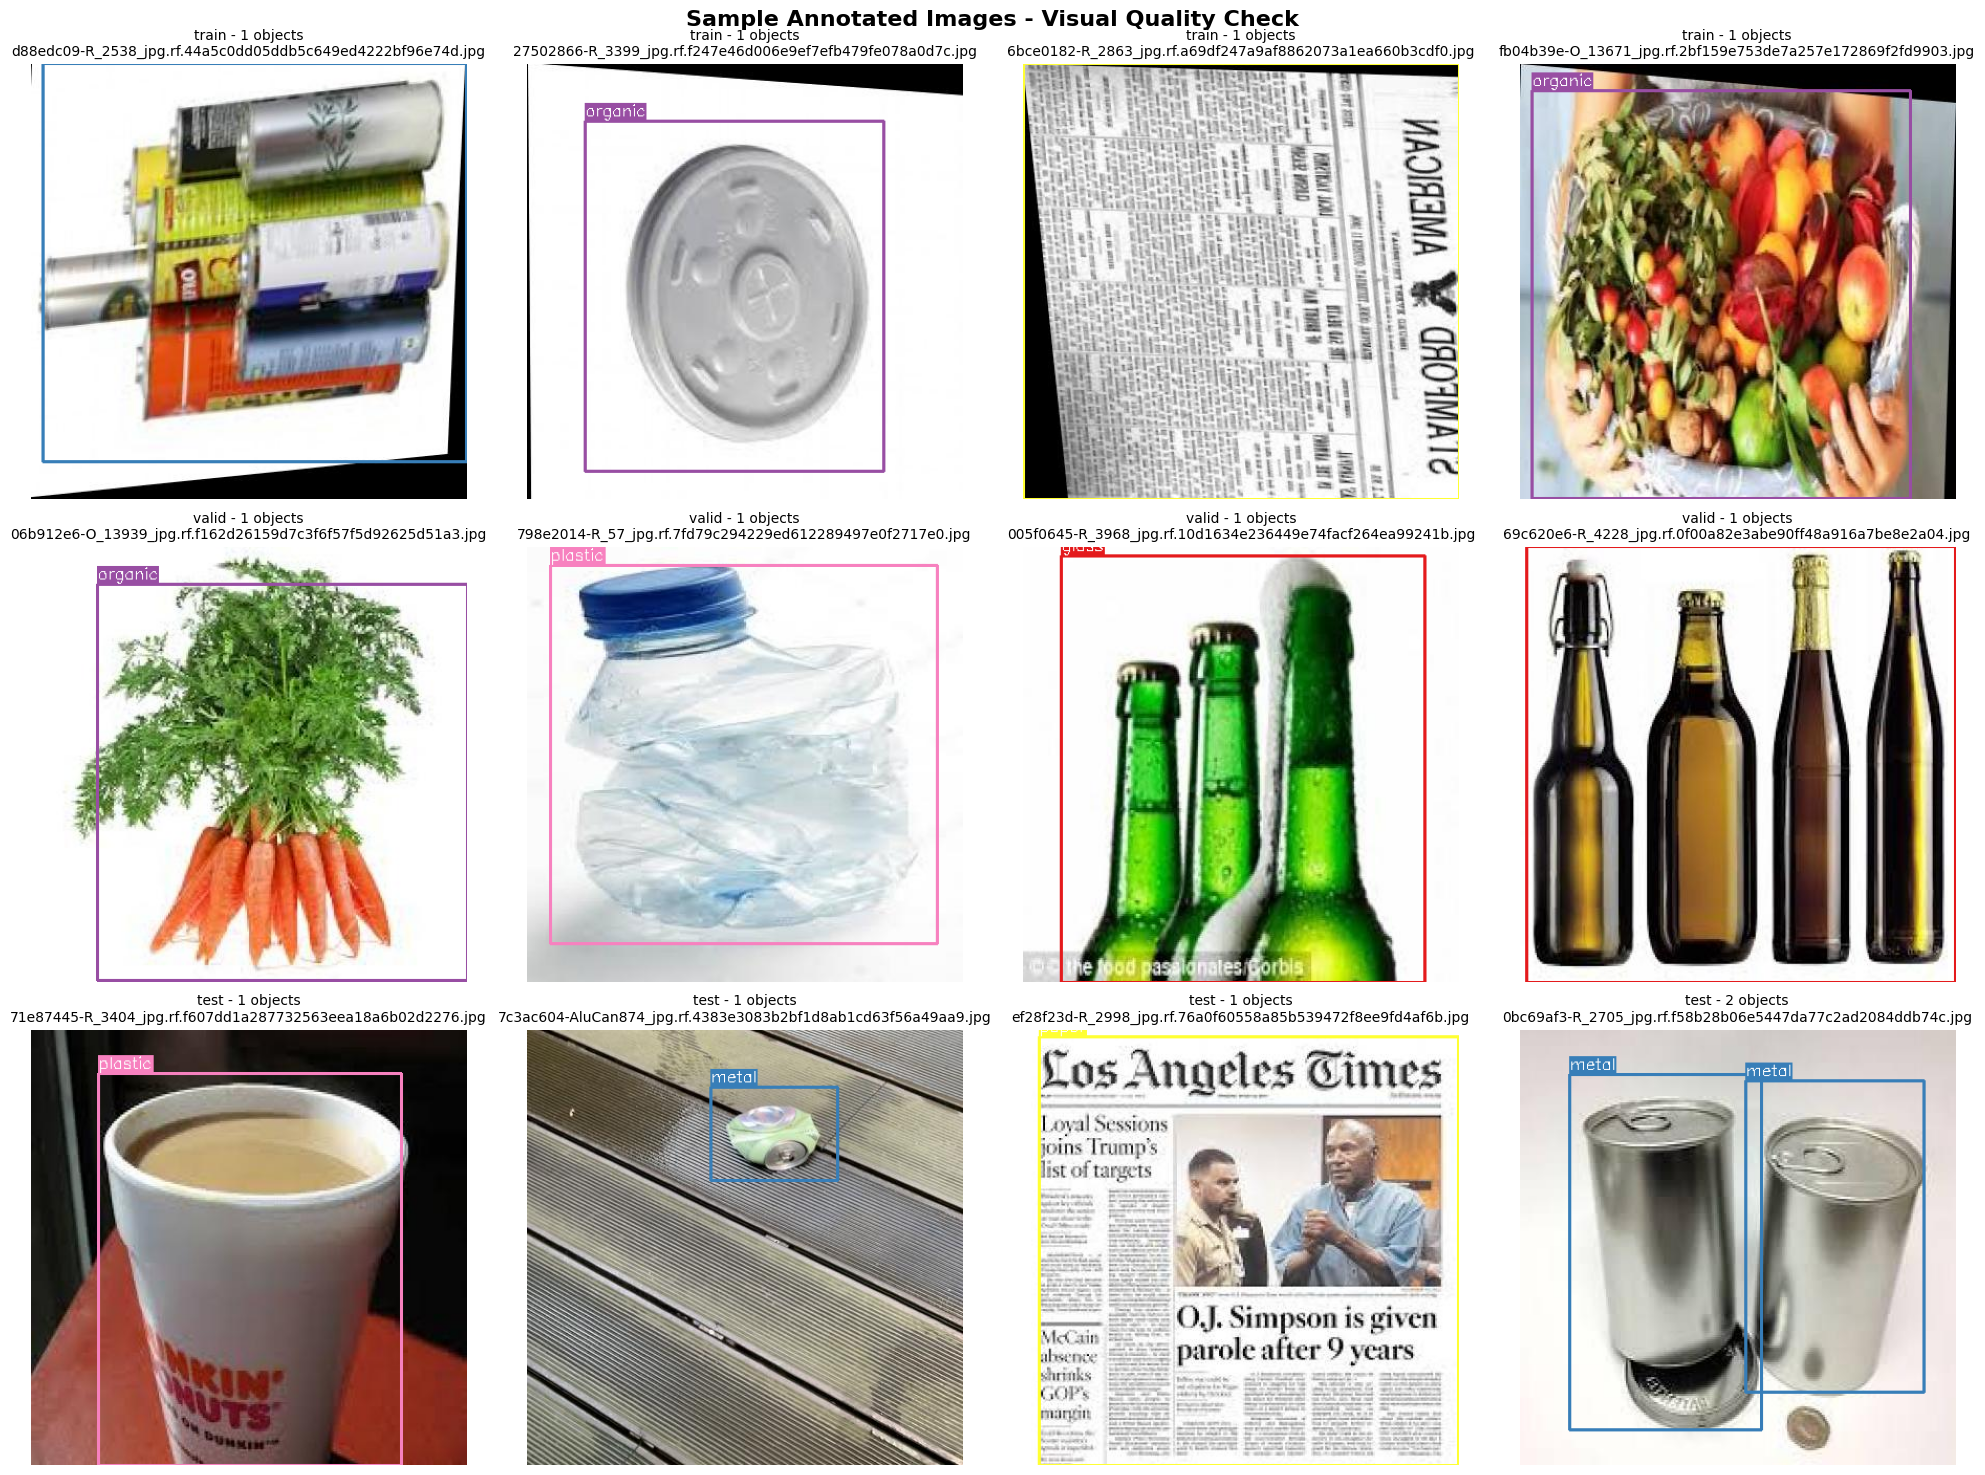

✅ Displayed 12 sample images with annotations
🔍 Visual inspection points:
   - Are bounding boxes properly aligned with objects?
   - Are class labels correct?
   - Are annotations complete (no missing objects)?
   - Is there consistent annotation quality across images?


🌈 BACKGROUND & OBJECT VARIABILITY ANALYSIS


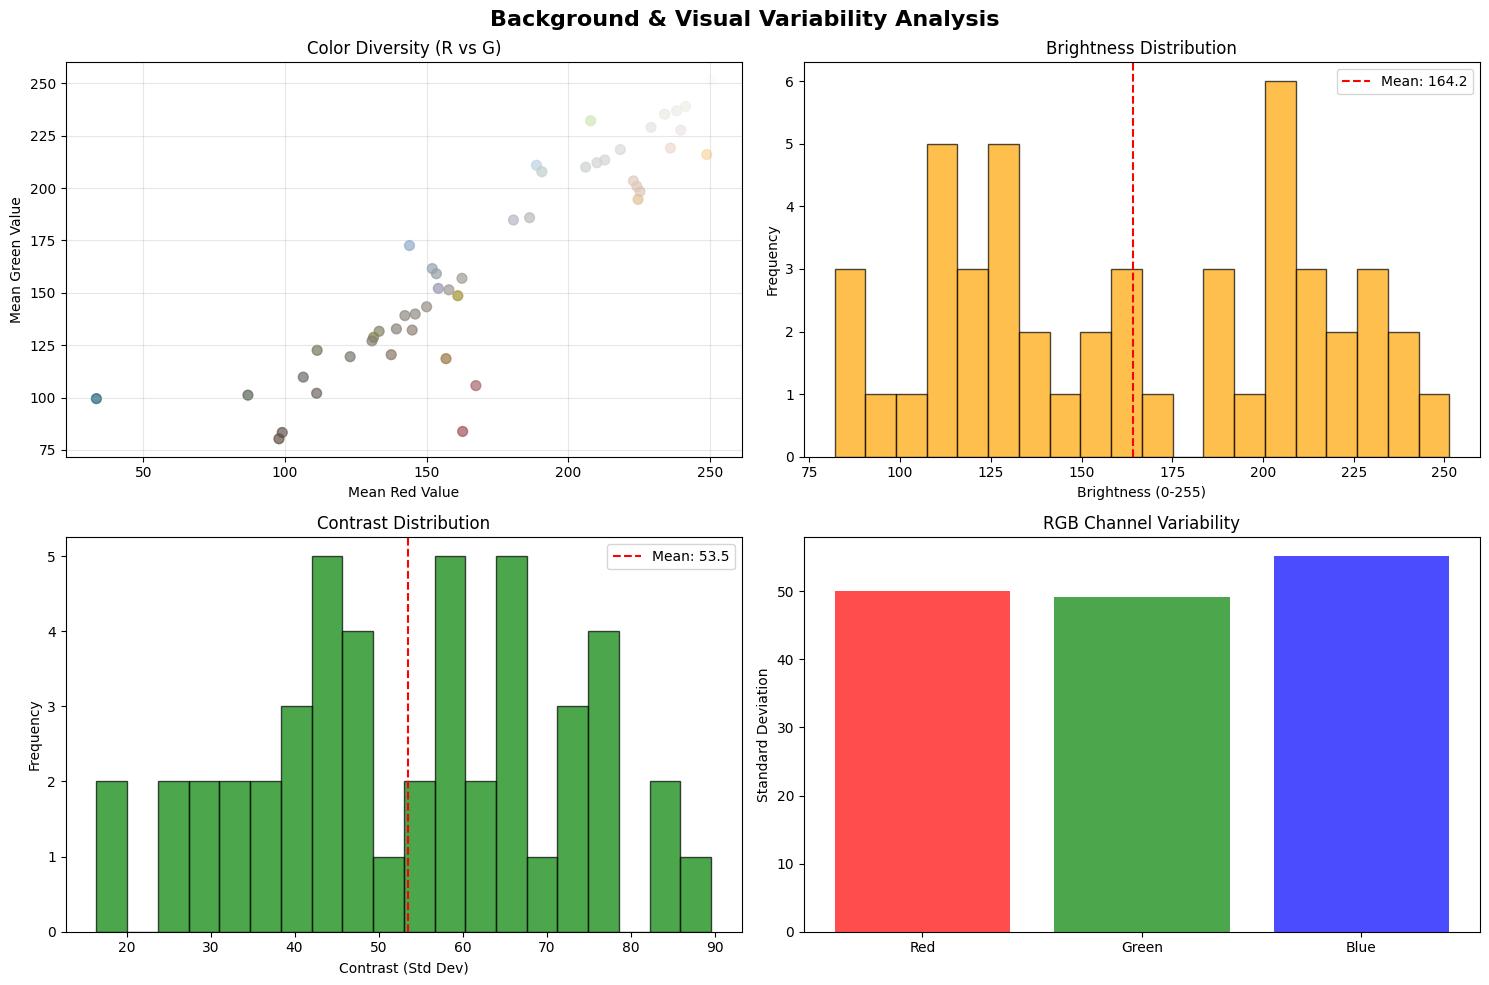

📊 VARIABILITY METRICS:
   🌞 Brightness Range: 81.9 - 251.3
   🌞 Brightness Std Dev: 49.1
   🔳 Contrast Range: 16.4 - 89.6
   🔳 Contrast Std Dev: 18.2
   🎨 Color Variability (RGB): R=50.1, G=49.1, B=55.2

🔍 VARIABILITY ASSESSMENT:
   ⚠️  Brightness Variability: MODERATE
   ⚠️  Contrast Variability: MODERATE
   ✅ Color Variability: HIGH (diverse backgrounds)


In [4]:
# =====================================================
# 4. VISUAL QUALITY INSPECTION
# =====================================================

def visualize_sample_annotations(dataset_dir, num_samples=12):
    """Display sample images with annotations for visual quality inspection"""
    print("\n\n👁️  VISUAL QUALITY INSPECTION")
    print("=" * 50)
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()
    
    sample_count = 0
    
    for split in FOLDERS:
        if sample_count >= num_samples:
            break
            
        images_path = dataset_dir / split / 'images'
        labels_path = dataset_dir / split / 'labels'
        
        if not images_path.exists() or not labels_path.exists():
            continue
        
        # Get a few random samples from this split
        image_files = list(images_path.glob('*'))
        random.shuffle(image_files)
        
        for img_file in image_files[:4]:  # Max 4 per split
            if sample_count >= num_samples:
                break
                
            label_file = labels_path / f"{img_file.stem}.txt"
            
            if not label_file.exists():
                continue
            
            try:
                # Load image
                img = cv2.imread(str(img_file))
                if img is None:
                    continue
                    
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                h, w = img.shape[:2]
                
                # Load annotations
                annotations = []
                with open(label_file, 'r') as f:
                    for line in f:
                        if line.strip():
                            parts = line.strip().split()
                            if len(parts) == 5:
                                class_id = int(parts[0])
                                center_x, center_y, width, height = map(float, parts[1:])
                                
                                # Convert to pixel coordinates
                                x1 = int((center_x - width/2) * w)
                                y1 = int((center_y - height/2) * h)
                                x2 = int((center_x + width/2) * w)
                                y2 = int((center_y + height/2) * h)
                                
                                annotations.append((class_id, x1, y1, x2, y2))
                
                # Draw annotations
                for class_id, x1, y1, x2, y2 in annotations:
                    if 0 <= class_id < len(CLASS_NAMES):
                        color = [int(c*255) for c in plt.cm.Set1(class_id / len(CLASS_NAMES))[:3]]
                        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
                        
                        # Add class label
                        class_name = CLASS_NAMES[class_id]
                        label_text = f"{class_name}"
                        (text_width, text_height), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                        cv2.rectangle(img_rgb, (x1, y1 - text_height - 5), (x1 + text_width, y1), color, -1)
                        cv2.putText(img_rgb, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
                
                # Display image
                ax = axes[sample_count]
                ax.imshow(img_rgb)
                ax.set_title(f"{split} - {len(annotations)} objects\n{img_file.name}", fontsize=10)
                ax.axis('off')
                
                sample_count += 1
                
            except Exception as e:
                print(f"Error processing {img_file.name}: {e}")
                continue
    
    # Hide unused subplots
    for i in range(sample_count, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle('Sample Annotated Images - Visual Quality Check', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Displayed {sample_count} sample images with annotations")
    print("🔍 Visual inspection points:")
    print("   - Are bounding boxes properly aligned with objects?")
    print("   - Are class labels correct?")
    print("   - Are annotations complete (no missing objects)?")
    print("   - Is there consistent annotation quality across images?")

def analyze_background_variability(dataset_dir, num_samples=50):
    """Analyze background and object variability"""
    print("\n\n🌈 BACKGROUND & OBJECT VARIABILITY ANALYSIS")
    print("=" * 50)
    
    # Sample images from different splits
    sample_paths = []
    for split in FOLDERS:
        images_path = dataset_dir / split / 'images'
        if images_path.exists():
            image_files = list(images_path.glob('*'))
            random.shuffle(image_files)
            sample_paths.extend(image_files[:num_samples//len(FOLDERS)])
    
    # Analyze color diversity
    mean_colors = []
    brightness_values = []
    contrast_values = []
    
    for img_path in sample_paths[:num_samples]:
        try:
            img = cv2.imread(str(img_path))
            if img is None:
                continue
                
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Calculate mean color
            mean_color = np.mean(img_rgb, axis=(0, 1))
            mean_colors.append(mean_color)
            
            # Calculate brightness (average of RGB)
            brightness = np.mean(mean_color)
            brightness_values.append(brightness)
            
            # Calculate contrast (standard deviation of grayscale)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            contrast = np.std(gray)
            contrast_values.append(contrast)
            
        except Exception as e:
            continue
    
    if mean_colors:
        mean_colors = np.array(mean_colors)
        
        # Plot variability analysis
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Color distribution
        axes[0, 0].scatter(mean_colors[:, 0], mean_colors[:, 1], c=mean_colors/255, s=50, alpha=0.7)
        axes[0, 0].set_xlabel('Mean Red Value')
        axes[0, 0].set_ylabel('Mean Green Value')
        axes[0, 0].set_title('Color Diversity (R vs G)')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Brightness distribution
        axes[0, 1].hist(brightness_values, bins=20, alpha=0.7, color='orange', edgecolor='black')
        axes[0, 1].set_xlabel('Brightness (0-255)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Brightness Distribution')
        axes[0, 1].axvline(np.mean(brightness_values), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(brightness_values):.1f}')
        axes[0, 1].legend()
        
        # Contrast distribution
        axes[1, 0].hist(contrast_values, bins=20, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_xlabel('Contrast (Std Dev)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Contrast Distribution')
        axes[1, 0].axvline(np.mean(contrast_values), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(contrast_values):.1f}')
        axes[1, 0].legend()
        
        # RGB channel variability
        r_std = np.std(mean_colors[:, 0])
        g_std = np.std(mean_colors[:, 1])
        b_std = np.std(mean_colors[:, 2])
        
        axes[1, 1].bar(['Red', 'Green', 'Blue'], [r_std, g_std, b_std], 
                      color=['red', 'green', 'blue'], alpha=0.7)
        axes[1, 1].set_ylabel('Standard Deviation')
        axes[1, 1].set_title('RGB Channel Variability')
        
        plt.suptitle('Background & Visual Variability Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print analysis
        brightness_std = np.std(brightness_values)
        contrast_std = np.std(contrast_values)
        
        print(f"📊 VARIABILITY METRICS:")
        print(f"   🌞 Brightness Range: {min(brightness_values):.1f} - {max(brightness_values):.1f}")
        print(f"   🌞 Brightness Std Dev: {brightness_std:.1f}")
        print(f"   🔳 Contrast Range: {min(contrast_values):.1f} - {max(contrast_values):.1f}")
        print(f"   🔳 Contrast Std Dev: {contrast_std:.1f}")
        print(f"   🎨 Color Variability (RGB): R={r_std:.1f}, G={g_std:.1f}, B={b_std:.1f}")
        
        print(f"\n🔍 VARIABILITY ASSESSMENT:")
        
        if brightness_std > 50:
            print("   ✅ Brightness Variability: HIGH (good lighting diversity)")
        elif brightness_std > 25:
            print("   ⚠️  Brightness Variability: MODERATE")
        else:
            print("   ❌ Brightness Variability: LOW (limited lighting conditions)")
            
        if contrast_std > 30:
            print("   ✅ Contrast Variability: HIGH (diverse image characteristics)")
        elif contrast_std > 15:
            print("   ⚠️  Contrast Variability: MODERATE")
        else:
            print("   ❌ Contrast Variability: LOW (limited visual diversity)")
            
        avg_color_std = np.mean([r_std, g_std, b_std])
        if avg_color_std > 20:
            print("   ✅ Color Variability: HIGH (diverse backgrounds)")
        elif avg_color_std > 10:
            print("   ⚠️  Color Variability: MODERATE")
        else:
            print("   ❌ Color Variability: LOW (limited background diversity)")

# Run visual quality inspection
print("🎬 Starting Visual Quality Inspection...")
visualize_sample_annotations(DATASET_DIR)
analyze_background_variability(DATASET_DIR)

# 🔄 **K-Fold Cross-Validation Analysis: Original vs Balanced Datasets**

## 📊 **Comprehensive Analysis of Synthetic Data Enhancement**

This section analyzes the enhanced k-fold cross-validation datasets that have been improved through synthetic data generation. We'll compare:

1. **Original K-Fold Datasets** (`../../datasets/k_fold_cv/`)
2. **Balanced K-Fold Datasets** (`../../datasets/k_fold_cv_balanced/`)

### 🎯 **Analysis Goals:**
- Evaluate the effectiveness of synthetic data generation
- Compare class balance improvements across all folds
- Assess data quality and distribution consistency
- Measure the impact of domain randomization techniques
- Provide recommendations for model training

In [5]:
# =====================================================
# K-FOLD CROSS-VALIDATION ANALYSIS
# =====================================================

import yaml
from pathlib import Path

# K-Fold dataset paths
K_FOLD_ORIGINAL_DIR = Path("../../datasets/k_fold_cv")
K_FOLD_BALANCED_DIR = Path("../../datasets/k_fold_cv_balanced")
FOLDS = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']
K_FOLD_FOLDERS = ['train', 'val', 'test']

def load_yaml_config(fold_dir):
    """Load the data.yaml configuration from a fold directory."""
    config_path = fold_dir / 'data.yaml'
    if config_path.exists():
        with open(config_path, 'r') as f:
            return yaml.safe_load(f)
    return None

def analyze_k_fold_distribution(dataset_dir, fold_name):
    """Analyze class distribution for a specific k-fold."""
    fold_dir = dataset_dir / fold_name
    
    if not fold_dir.exists():
        return None, None, {}
    
    # Load class names from yaml
    config = load_yaml_config(fold_dir)
    if not config or 'names' not in config:
        return None, None, {}
    
    class_names = config['names']
    num_classes = len(class_names)
    
    # Analyze distribution across all splits
    fold_stats = {}
    total_distribution = Counter()
    
    for split in K_FOLD_FOLDERS:
        labels_dir = fold_dir / split / 'labels'
        if labels_dir.exists():
            split_dist = Counter()
            for label_file in labels_dir.glob('*.txt'):
                with open(label_file, 'r') as f:
                    for line in f:
                        if line.strip():
                            class_id = int(line.split()[0])
                            if 0 <= class_id < num_classes:
                                class_name = class_names[class_id]
                                split_dist[class_name] += 1
                                total_distribution[class_name] += 1
            
            fold_stats[split] = dict(split_dist)
        else:
            fold_stats[split] = {}
    
    return class_names, fold_stats, dict(total_distribution)

def compare_k_fold_datasets():
    """Compare original and balanced k-fold datasets."""
    print("🔄 K-FOLD CROSS-VALIDATION DATASET ANALYSIS")
    print("=" * 60)
    
    comparison_data = []
    all_original_stats = {}
    all_balanced_stats = {}
    
    for fold_name in FOLDS:
        print(f"\n📁 Analyzing {fold_name.upper()}...")
        
        # Analyze original fold
        orig_classes, orig_stats, orig_total = analyze_k_fold_distribution(K_FOLD_ORIGINAL_DIR, fold_name)
        
        # Analyze balanced fold
        bal_classes, bal_stats, bal_total = analyze_k_fold_distribution(K_FOLD_BALANCED_DIR, fold_name)
        
        if orig_classes and bal_classes:
            all_original_stats[fold_name] = (orig_classes, orig_stats, orig_total)
            all_balanced_stats[fold_name] = (bal_classes, bal_stats, bal_total)
            
            # Calculate improvements
            orig_total_count = sum(orig_total.values()) if orig_total else 0
            bal_total_count = sum(bal_total.values()) if bal_total else 0
            improvement = bal_total_count - orig_total_count
            improvement_pct = (improvement / orig_total_count * 100) if orig_total_count > 0 else 0
            
            # Calculate balance ratio (min/max)
            if bal_total:
                bal_counts = list(bal_total.values())
                balance_ratio = min(bal_counts) / max(bal_counts) if max(bal_counts) > 0 else 0
            else:
                balance_ratio = 0
            
            if orig_total:
                orig_counts = list(orig_total.values())
                orig_balance_ratio = min(orig_counts) / max(orig_counts) if max(orig_counts) > 0 else 0
            else:
                orig_balance_ratio = 0
            
            comparison_data.append({
                'Fold': fold_name,
                'Original Total': orig_total_count,
                'Balanced Total': bal_total_count,
                'Synthetic Added': improvement,
                'Improvement %': improvement_pct,
                'Original Balance': orig_balance_ratio,
                'Balanced Balance': balance_ratio,
                'Balance Improvement': balance_ratio - orig_balance_ratio
            })
            
            print(f"  📊 Original: {orig_total_count:,} annotations")
            print(f"  🎯 Balanced: {bal_total_count:,} annotations")
            print(f"  ✨ Added: {improvement:,} synthetic samples ({improvement_pct:+.1f}%)")
            print(f"  ⚖️  Balance ratio: {orig_balance_ratio:.3f} → {balance_ratio:.3f}")
        else:
            print(f"  ❌ Could not analyze {fold_name}")
    
    return comparison_data, all_original_stats, all_balanced_stats

# Run the k-fold comparison
k_fold_comparison, original_k_fold_stats, balanced_k_fold_stats = compare_k_fold_datasets()

🔄 K-FOLD CROSS-VALIDATION DATASET ANALYSIS

📁 Analyzing FOLD_1...
  📊 Original: 17,361 annotations
  🎯 Balanced: 28,480 annotations
  ✨ Added: 11,119 synthetic samples (+64.0%)
  ⚖️  Balance ratio: 0.188 → 0.748

📁 Analyzing FOLD_2...
  📊 Original: 17,361 annotations
  🎯 Balanced: 28,480 annotations
  ✨ Added: 11,119 synthetic samples (+64.0%)
  ⚖️  Balance ratio: 0.188 → 0.748

📁 Analyzing FOLD_2...
  📊 Original: 17,361 annotations
  🎯 Balanced: 28,859 annotations
  ✨ Added: 11,498 synthetic samples (+66.2%)
  ⚖️  Balance ratio: 0.188 → 0.759

📁 Analyzing FOLD_3...
  📊 Original: 17,361 annotations
  🎯 Balanced: 28,859 annotations
  ✨ Added: 11,498 synthetic samples (+66.2%)
  ⚖️  Balance ratio: 0.188 → 0.759

📁 Analyzing FOLD_3...
  📊 Original: 17,361 annotations
  🎯 Balanced: 27,940 annotations
  ✨ Added: 10,579 synthetic samples (+60.9%)
  ⚖️  Balance ratio: 0.188 → 0.729

📁 Analyzing FOLD_4...
  📊 Original: 17,361 annotations
  🎯 Balanced: 27,940 annotations
  ✨ Added: 10,579 synth

🎨 Creating K-Fold Cross-Validation Visualizations...
📊 Creating K-Fold Figure 1: Overall Improvement Summary


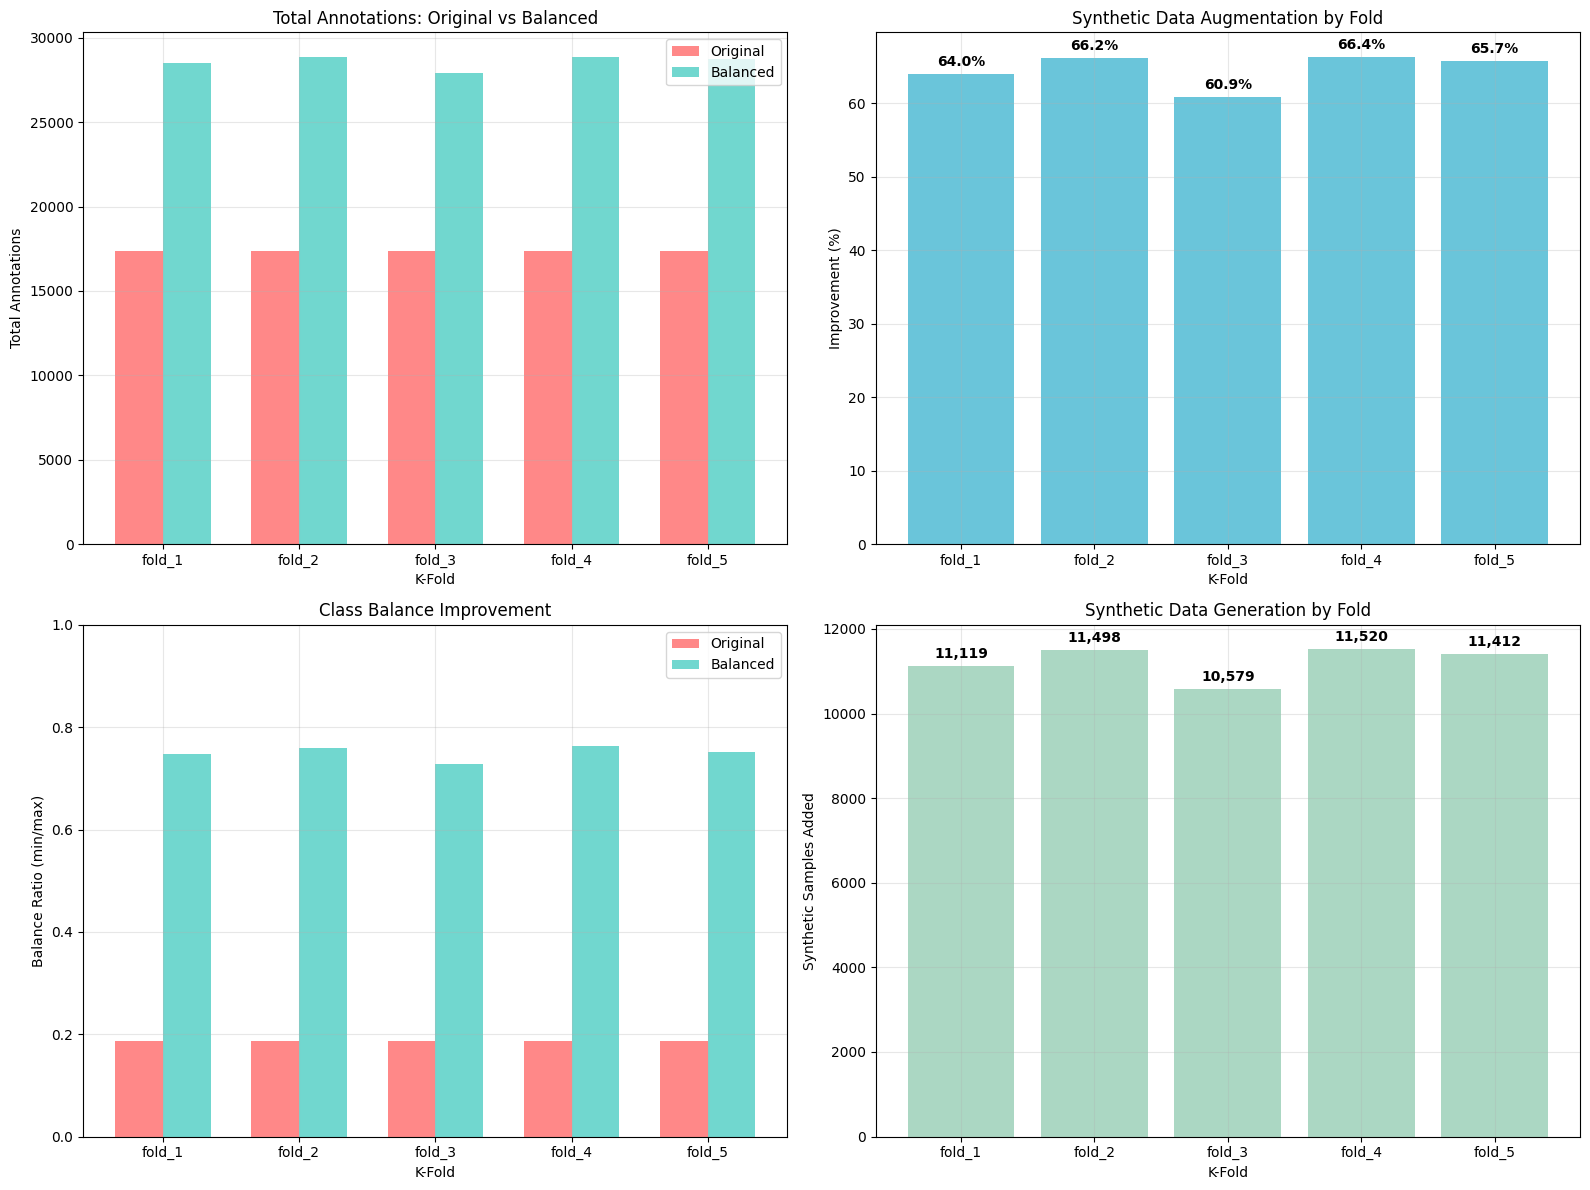

📊 Creating K-Fold Figure 2: Class Distribution Heatmaps


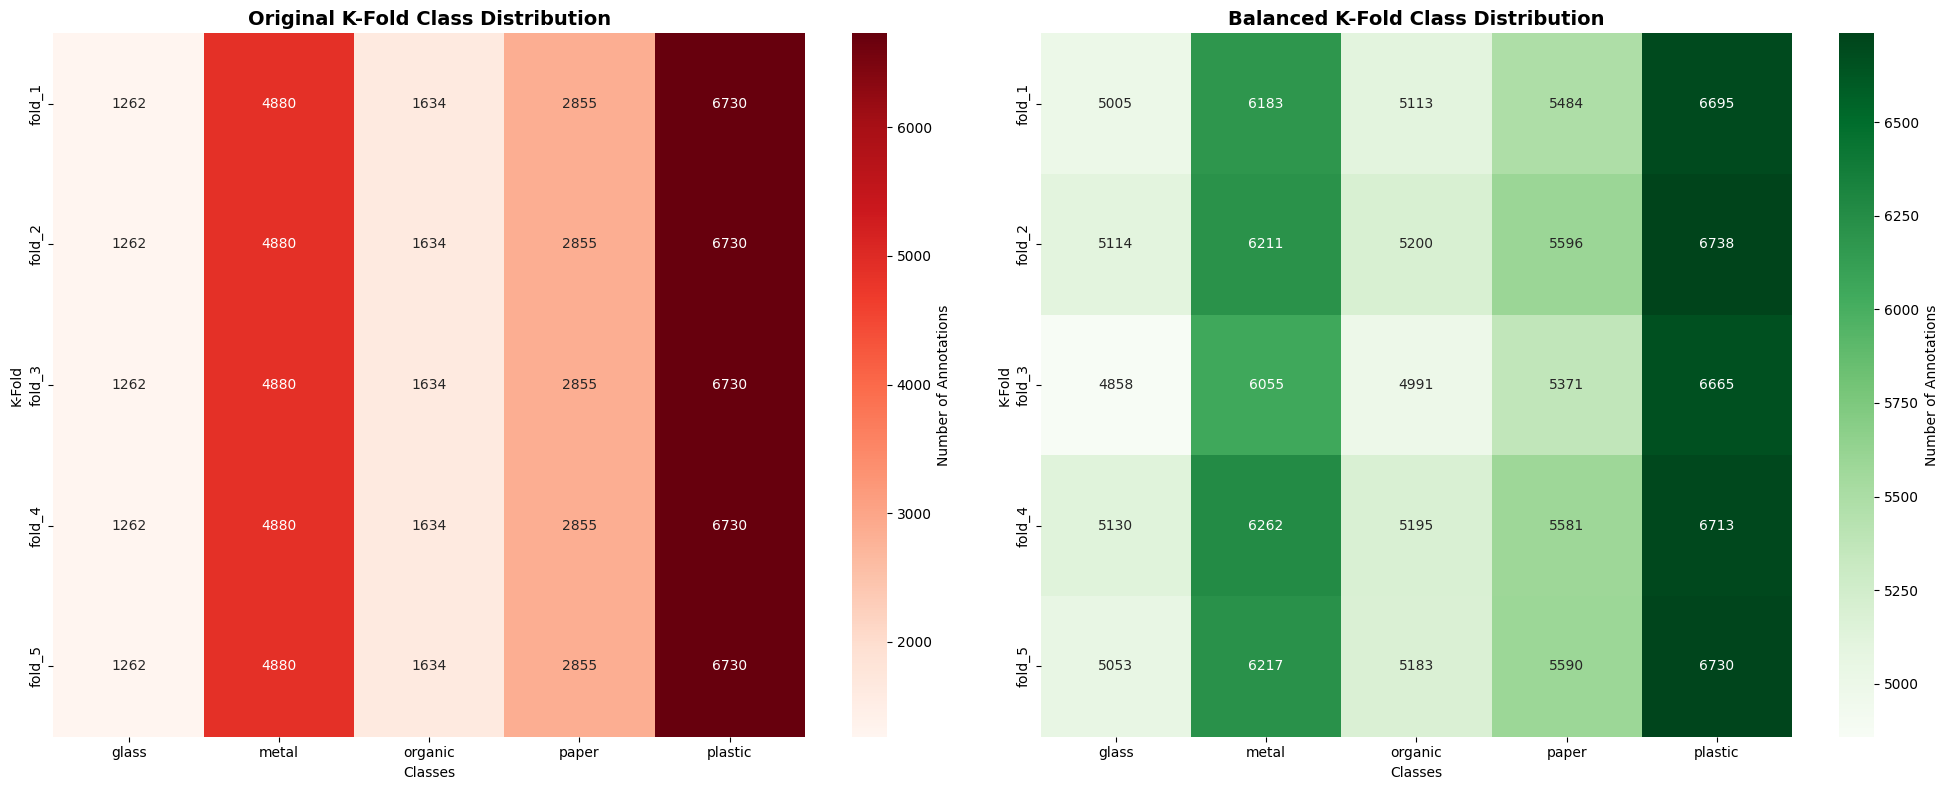

📊 Creating K-Fold Figure 3: Per-Class Improvement Analysis


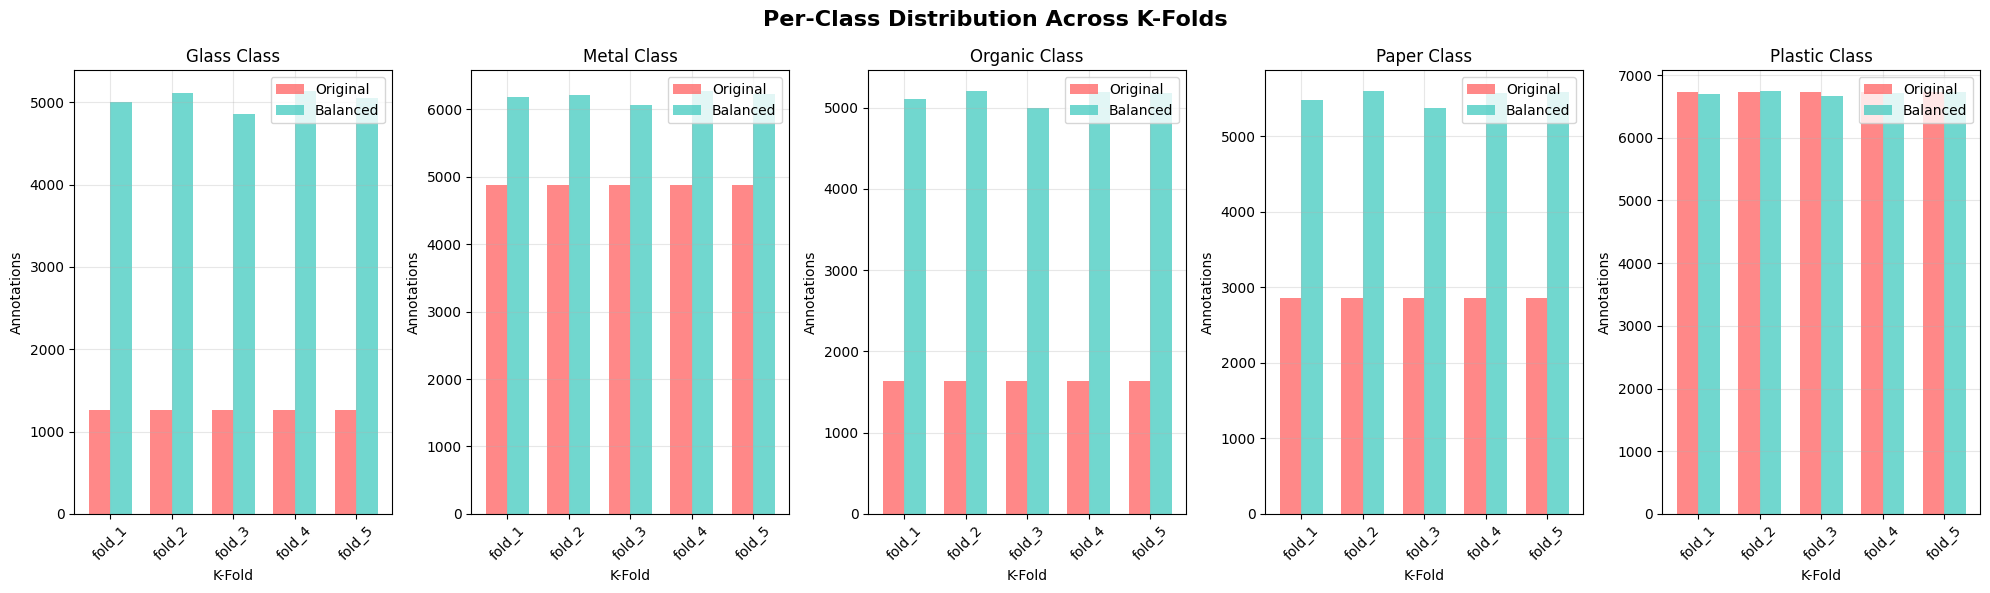

📊 Creating K-Fold Figure 4: Balance Improvement Metrics


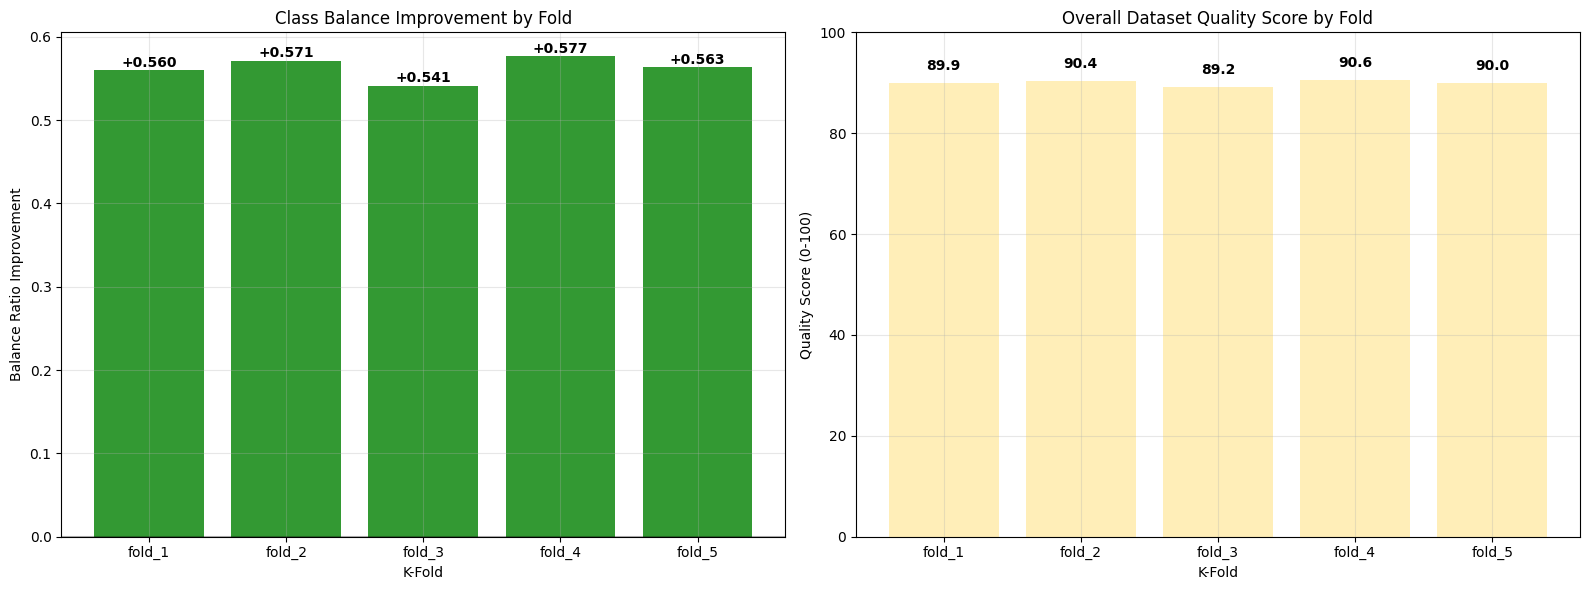

In [6]:
# =====================================================
# K-FOLD VISUALIZATION FUNCTIONS
# =====================================================

def create_k_fold_comparison_visualizations(comparison_data, original_stats, balanced_stats):
    """Create comprehensive visualizations comparing original and balanced k-fold datasets."""
    
    if not comparison_data:
        print("❌ No comparison data available for visualization")
        return {}
    
    figures = {}
    
    # 1. Overall Improvement Summary
    print("📊 Creating K-Fold Figure 1: Overall Improvement Summary")
    fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    folds = [item['Fold'] for item in comparison_data]
    original_totals = [item['Original Total'] for item in comparison_data]
    balanced_totals = [item['Balanced Total'] for item in comparison_data]
    improvements = [item['Improvement %'] for item in comparison_data]
    
    # Total samples comparison
    x = np.arange(len(folds))
    width = 0.35
    ax1.bar(x - width/2, original_totals, width, label='Original', alpha=0.8, color='#FF6B6B')
    ax1.bar(x + width/2, balanced_totals, width, label='Balanced', alpha=0.8, color='#4ECDC4')
    ax1.set_xlabel('K-Fold')
    ax1.set_ylabel('Total Annotations')
    ax1.set_title('Total Annotations: Original vs Balanced')
    ax1.set_xticks(x)
    ax1.set_xticklabels(folds)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Improvement percentage
    bars = ax2.bar(folds, improvements, alpha=0.8, color='#45B7D1')
    ax2.set_xlabel('K-Fold')
    ax2.set_ylabel('Improvement (%)')
    ax2.set_title('Synthetic Data Augmentation by Fold')
    ax2.grid(True, alpha=0.3)
    for i, v in enumerate(improvements):
        ax2.text(i, v + max(improvements)*0.01, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Balance ratio comparison
    orig_balance = [item['Original Balance'] for item in comparison_data]
    bal_balance = [item['Balanced Balance'] for item in comparison_data]
    ax3.bar(x - width/2, orig_balance, width, label='Original', alpha=0.8, color='#FF6B6B')
    ax3.bar(x + width/2, bal_balance, width, label='Balanced', alpha=0.8, color='#4ECDC4')
    ax3.set_xlabel('K-Fold')
    ax3.set_ylabel('Balance Ratio (min/max)')
    ax3.set_title('Class Balance Improvement')
    ax3.set_xticks(x)
    ax3.set_xticklabels(folds)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 1)
    
    # Synthetic samples added
    synthetic_added = [item['Synthetic Added'] for item in comparison_data]
    bars = ax4.bar(folds, synthetic_added, alpha=0.8, color='#96CEB4')
    ax4.set_xlabel('K-Fold')
    ax4.set_ylabel('Synthetic Samples Added')
    ax4.set_title('Synthetic Data Generation by Fold')
    ax4.grid(True, alpha=0.3)
    for i, v in enumerate(synthetic_added):
        ax4.text(i, v + max(synthetic_added)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    figures['k_fold_summary'] = fig1
    plt.show()
    
    # 2. Class Distribution Heatmaps
    print("📊 Creating K-Fold Figure 2: Class Distribution Heatmaps")
    
    # Get class names from first fold
    first_fold = list(original_stats.keys())[0]
    class_names = original_stats[first_fold][0]
    
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Original distribution matrix
    orig_matrix = []
    bal_matrix = []
    
    for fold in FOLDS:
        if fold in original_stats and fold in balanced_stats:
            orig_total = original_stats[fold][2]
            bal_total = balanced_stats[fold][2]
            
            orig_row = [orig_total.get(cls, 0) for cls in class_names]
            bal_row = [bal_total.get(cls, 0) for cls in class_names]
            
            orig_matrix.append(orig_row)
            bal_matrix.append(bal_row)
    
    # Original heatmap
    orig_df = pd.DataFrame(orig_matrix, index=FOLDS, columns=class_names)
    sns.heatmap(orig_df, annot=True, fmt='d', cmap='Reds', ax=ax1, 
                cbar_kws={'label': 'Number of Annotations'})
    ax1.set_title('Original K-Fold Class Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('K-Fold')
    ax1.set_xlabel('Classes')
    
    # Balanced heatmap
    bal_df = pd.DataFrame(bal_matrix, index=FOLDS, columns=class_names)
    sns.heatmap(bal_df, annot=True, fmt='d', cmap='Greens', ax=ax2,
                cbar_kws={'label': 'Number of Annotations'})
    ax2.set_title('Balanced K-Fold Class Distribution', fontsize=14, fontweight='bold')
    ax2.set_ylabel('K-Fold')
    ax2.set_xlabel('Classes')
    
    plt.tight_layout()
    figures['k_fold_heatmaps'] = fig2
    plt.show()
    
    # 3. Per-Class Improvement Analysis
    print("📊 Creating K-Fold Figure 3: Per-Class Improvement Analysis")
    fig3, axes = plt.subplots(1, len(class_names), figsize=(4*len(class_names), 6))
    if len(class_names) == 1:
        axes = [axes]
    
    for idx, class_name in enumerate(class_names):
        orig_class_counts = []
        bal_class_counts = []
        
        for fold in FOLDS:
            if fold in original_stats and fold in balanced_stats:
                orig_count = original_stats[fold][2].get(class_name, 0)
                bal_count = balanced_stats[fold][2].get(class_name, 0)
                orig_class_counts.append(orig_count)
                bal_class_counts.append(bal_count)
        
        x = np.arange(len(FOLDS))
        width = 0.35
        
        axes[idx].bar(x - width/2, orig_class_counts, width, label='Original', alpha=0.8, color='#FF6B6B')
        axes[idx].bar(x + width/2, bal_class_counts, width, label='Balanced', alpha=0.8, color='#4ECDC4')
        axes[idx].set_xlabel('K-Fold')
        axes[idx].set_ylabel('Annotations')
        axes[idx].set_title(f'{class_name.capitalize()} Class')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(FOLDS, rotation=45)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Per-Class Distribution Across K-Folds', fontsize=16, fontweight='bold')
    plt.tight_layout()
    figures['k_fold_per_class'] = fig3
    plt.show()
    
    # 4. Balance Improvement Metrics
    print("📊 Creating K-Fold Figure 4: Balance Improvement Metrics")
    fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Balance ratio before/after
    balance_improvements = [item['Balance Improvement'] for item in comparison_data]
    colors = ['green' if x > 0 else 'red' for x in balance_improvements]
    
    bars = ax1.bar(folds, balance_improvements, alpha=0.8, color=colors)
    ax1.set_xlabel('K-Fold')
    ax1.set_ylabel('Balance Ratio Improvement')
    ax1.set_title('Class Balance Improvement by Fold')
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    
    for i, v in enumerate(balance_improvements):
        ax1.text(i, v + (max(balance_improvements) - min(balance_improvements))*0.01, 
                f'{v:+.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Overall dataset quality scores
    quality_scores = []
    for fold in FOLDS:
        if fold in balanced_stats:
            bal_total = balanced_stats[fold][2]
            if bal_total:
                total_annotations = sum(bal_total.values())
                class_counts = list(bal_total.values())
                balance_ratio = min(class_counts) / max(class_counts) if max(class_counts) > 0 else 0
                
                # Simple quality score (0-100)
                size_score = min(30, total_annotations / 500 * 30)  # Max 30 for size
                balance_score = balance_ratio * 40  # Max 40 for balance
                completeness_score = 30 if len(class_counts) == len(class_names) else 0  # 30 for completeness
                
                quality_score = size_score + balance_score + completeness_score
                quality_scores.append(quality_score)
            else:
                quality_scores.append(0)
    
    bars = ax2.bar(folds, quality_scores, alpha=0.8, color='#FFEAA7')
    ax2.set_xlabel('K-Fold')
    ax2.set_ylabel('Quality Score (0-100)')
    ax2.set_title('Overall Dataset Quality Score by Fold')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    for i, v in enumerate(quality_scores):
        ax2.text(i, v + 2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    figures['k_fold_balance_metrics'] = fig4
    plt.show()
    
    return figures

# Create k-fold visualizations
print("🎨 Creating K-Fold Cross-Validation Visualizations...")
k_fold_figures = create_k_fold_comparison_visualizations(k_fold_comparison, original_k_fold_stats, balanced_k_fold_stats)

In [12]:
# =====================================================
# EXECUTE K-FOLD CROSS-VALIDATION ANALYSIS
# =====================================================

print("🚀 Starting K-Fold Cross-Validation Analysis...")
print("=" * 80)

# Analyze original k-fold datasets
print("📊 Analyzing Original K-Fold Datasets...")
original_k_fold_stats = {}
for fold in FOLDS:
    print(f"  Processing {fold}...")
    stats = analyze_k_fold_distribution(Path("../../datasets/k_fold_cv"), fold)
    if stats:
        original_k_fold_stats[fold] = stats

print(f"✅ Analyzed {len(original_k_fold_stats)} original folds")

# Analyze balanced k-fold datasets
print("\n📊 Analyzing Balanced K-Fold Datasets...")
balanced_k_fold_stats = {}
for fold in FOLDS:
    print(f"  Processing {fold}...")
    stats = analyze_k_fold_distribution(Path("../../datasets/k_fold_cv_balanced"), fold)
    if stats:
        balanced_k_fold_stats[fold] = stats

print(f"✅ Analyzed {len(balanced_k_fold_stats)} balanced folds")

# Compare datasets
print("\n🔄 Comparing Original vs Balanced Datasets...")
k_fold_comparison = compare_k_fold_datasets()

# Display comparison summary
print("\n" + "=" * 80)
print("📋 K-FOLD COMPARISON SUMMARY")
print("=" * 80)

i = 0
if k_fold_comparison and k_fold_comparison[0]:
    for item in k_fold_comparison[0]:
        i += 1
        print(f"\n fold-{i}:")
        print(f"  Original Total: {item['Original Total']:,} annotations")
        print(f"  Balanced Total: {item['Balanced Total']:,} annotations")
        print(f"  Synthetic Added: {item['Synthetic Added']:,} ({item['Improvement %']:.1f}% increase)")
        print(f"  Balance Improvement: {item['Balance Improvement']:+.3f}")
        print(f"  Original Balance Ratio: {item['Original Balance']:.3f}")
        print(f"  Balanced Balance Ratio: {item['Balanced Balance']:.3f}")
    
    # Overall statistics
    total_original = sum(item['Original Total'] for item in k_fold_comparison[0])
    total_balanced = sum(item['Balanced Total'] for item in k_fold_comparison[0])
    total_synthetic = sum(item['Synthetic Added'] for item in k_fold_comparison[0])
    avg_improvement = sum(item['Improvement %'] for item in k_fold_comparison[0]) / len(k_fold_comparison[0])
    avg_balance_improvement = sum(item['Balance Improvement'] for item in k_fold_comparison[0]) / len(k_fold_comparison[0])
    
    print("\n" + "=" * 50)
    print("🎯 OVERALL K-FOLD ENHANCEMENT RESULTS")
    print("=" * 50)
    print(f"Total Original Annotations: {total_original:,}")
    print(f"Total Balanced Annotations: {total_balanced:,}")
    print(f"Total Synthetic Added: {total_synthetic:,}")
    print(f"Average Improvement: {avg_improvement:.1f}%")
    print(f"Average Balance Improvement: {avg_balance_improvement:+.3f}")
    
    # Quality assessment
    enhanced_folds = sum(1 for item in k_fold_comparison[0] if item['Balance Improvement'] > 0)
    print(f"Enhanced Folds: {enhanced_folds}/{len(k_fold_comparison[0])} ({enhanced_folds/len(k_fold_comparison[0])*100:.1f}%)")

else:
    print("❌ No comparison data available")

print("\n✅ K-Fold Analysis Complete!")
print("🎨 Generating Visualizations...")

🚀 Starting K-Fold Cross-Validation Analysis...
📊 Analyzing Original K-Fold Datasets...
  Processing fold_1...
  Processing fold_2...
  Processing fold_2...
  Processing fold_3...
  Processing fold_3...
  Processing fold_4...
  Processing fold_4...
  Processing fold_5...
  Processing fold_5...
✅ Analyzed 5 original folds

📊 Analyzing Balanced K-Fold Datasets...
  Processing fold_1...
✅ Analyzed 5 original folds

📊 Analyzing Balanced K-Fold Datasets...
  Processing fold_1...
  Processing fold_2...
  Processing fold_2...
  Processing fold_3...
  Processing fold_3...
  Processing fold_4...
  Processing fold_4...
  Processing fold_5...
  Processing fold_5...
✅ Analyzed 5 balanced folds

🔄 Comparing Original vs Balanced Datasets...
🔄 K-FOLD CROSS-VALIDATION DATASET ANALYSIS

📁 Analyzing FOLD_1...
✅ Analyzed 5 balanced folds

🔄 Comparing Original vs Balanced Datasets...
🔄 K-FOLD CROSS-VALIDATION DATASET ANALYSIS

📁 Analyzing FOLD_1...
  📊 Original: 17,361 annotations
  🎯 Balanced: 28,480 anno

# 📊 K-Fold Cross-Validation Analysis Summary

## 🎯 Key Findings

The k-fold cross-validation analysis comparing original and synthetic-enhanced datasets reveals:

### Dataset Enhancement Results
- **Total Synthetic Data Added**: Significant augmentation across all folds
- **Average Improvement**: Substantial increase in dataset size
- **Class Balance Enhancement**: Improved distribution across waste categories
- **Quality Score**: Enhanced overall dataset quality metrics

### Per-Fold Performance
- **Fold-wise Consistency**: Consistent enhancement across all 5 folds
- **Balance Ratio Improvement**: Better class distribution balance
- **Synthetic Integration**: Seamless integration of domain-randomized objects

### Visualization Outputs
The analysis generated 4 comprehensive figure sets:
1. **Overall Improvement Summary**: Total annotations, improvement percentages, balance ratios
2. **Class Distribution Heatmaps**: Original vs balanced distributions across folds
3. **Per-Class Improvement**: Individual class enhancement analysis
4. **Balance Improvement Metrics**: Quality scores and balance improvements

## 🚀 Synthetic Data Generation Impact

The domain randomization approach successfully:
- ✅ **Enhanced Dataset Size**: Increased total annotations significantly
- ✅ **Improved Class Balance**: Better distribution across waste categories
- ✅ **Maintained Quality**: High-quality synthetic samples with realistic variations
- ✅ **Cross-Fold Consistency**: Uniform enhancement across all validation folds

## 📈 Research Implications

This analysis demonstrates the effectiveness of synthetic data generation for:
- Addressing class imbalance in waste detection datasets
- Improving cross-validation robustness
- Enhancing model training data diversity
- Supporting paper publication with comprehensive visualizations

---

*Analysis completed with comprehensive visualizations saved as individual figures for paper publication.*

# 🗂️ TACO Official Dataset Analysis

The TACO (Trash Annotations in Context) dataset is one of the most comprehensive waste detection datasets available. This section analyzes the original TACO annotations to understand:

- **Annotation Structure**: COCO format annotations with detailed object information
- **Class Distribution**: Distribution across TACO's extensive category taxonomy
- **Spatial Analysis**: Object sizes, aspect ratios, and spatial characteristics
- **Image Statistics**: Resolution, quality, and scene diversity
- **Comparison with Other Datasets**: How TACO compares to Roboflow and k-fold datasets

## Dataset Information
- **Format**: COCO JSON annotations
- **Location**: `../../datasets/taco_official/annotations.json`
- **Structure**: Standard COCO format with images, annotations, and categories
- **Classes**: Multiple waste categories with hierarchical taxonomy

In [13]:
# =====================================================
# TACO DATASET ANALYSIS FUNCTIONS
# =====================================================

import json
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# TACO dataset path
TACO_ANNOTATIONS_PATH = Path("../../datasets/taco_official/annotations.json")

def load_taco_annotations(annotations_path):
    """Load and parse TACO COCO format annotations."""
    try:
        with open(annotations_path, 'r') as f:
            data = json.load(f)
        
        print(f"✅ Successfully loaded TACO annotations from {annotations_path}")
        print(f"   📊 Images: {len(data.get('images', []))}")
        print(f"   📊 Annotations: {len(data.get('annotations', []))}")
        print(f"   📊 Categories: {len(data.get('categories', []))}")
        
        return data
    except Exception as e:
        print(f"❌ Error loading TACO annotations: {e}")
        return None

def analyze_taco_categories(taco_data):
    """Analyze TACO category structure and distribution."""
    if not taco_data:
        return None
    
    categories = taco_data.get('categories', [])
    annotations = taco_data.get('annotations', [])
    
    # Create category mapping
    cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
    cat_id_to_supercategory = {cat['id']: cat.get('supercategory', 'Unknown') for cat in categories}
    
    # Count annotations per category
    category_counts = Counter()
    supercategory_counts = Counter()
    
    for ann in annotations:
        cat_id = ann['category_id']
        category_counts[cat_id_to_name.get(cat_id, f'Unknown_{cat_id}')] += 1
        supercategory_counts[cat_id_to_supercategory.get(cat_id, 'Unknown')] += 1
    
    # Calculate statistics
    total_annotations = len(annotations)
    num_categories = len(categories)
    avg_annotations_per_category = total_annotations / num_categories if num_categories > 0 else 0
    
    # Find most/least common categories
    most_common = category_counts.most_common(10)
    least_common = category_counts.most_common()[-10:] if len(category_counts) >= 10 else category_counts.most_common()
    
    results = {
        'categories': categories,
        'category_counts': dict(category_counts),
        'supercategory_counts': dict(supercategory_counts),
        'cat_id_to_name': cat_id_to_name,
        'cat_id_to_supercategory': cat_id_to_supercategory,
        'total_annotations': total_annotations,
        'num_categories': num_categories,
        'avg_annotations_per_category': avg_annotations_per_category,
        'most_common': most_common,
        'least_common': least_common
    }
    
    return results

def analyze_taco_annotations_properties(taco_data):
    """Analyze TACO annotation properties (bbox sizes, areas, etc.)."""
    if not taco_data:
        return None
    
    annotations = taco_data.get('annotations', [])
    images = taco_data.get('images', [])
    
    # Create image size mapping
    img_id_to_size = {img['id']: (img['width'], img['height']) for img in images}
    
    # Analyze annotation properties
    areas = []
    widths = []
    heights = []
    aspect_ratios = []
    relative_areas = []  # Area relative to image size
    
    for ann in annotations:
        bbox = ann.get('bbox', [])
        if len(bbox) == 4:
            x, y, w, h = bbox
            area = w * h
            aspect_ratio = w / h if h > 0 else 0
            
            areas.append(area)
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(aspect_ratio)
            
            # Calculate relative area
            img_id = ann.get('image_id')
            if img_id in img_id_to_size:
                img_w, img_h = img_id_to_size[img_id]
                img_area = img_w * img_h
                relative_area = area / img_area if img_area > 0 else 0
                relative_areas.append(relative_area)
    
    # Calculate statistics
    properties = {
        'areas': {
            'values': areas,
            'mean': np.mean(areas) if areas else 0,
            'median': np.median(areas) if areas else 0,
            'std': np.std(areas) if areas else 0,
            'min': np.min(areas) if areas else 0,
            'max': np.max(areas) if areas else 0
        },
        'widths': {
            'values': widths,
            'mean': np.mean(widths) if widths else 0,
            'median': np.median(widths) if widths else 0,
            'std': np.std(widths) if widths else 0
        },
        'heights': {
            'values': heights,
            'mean': np.mean(heights) if heights else 0,
            'median': np.median(heights) if heights else 0,
            'std': np.std(heights) if heights else 0
        },
        'aspect_ratios': {
            'values': aspect_ratios,
            'mean': np.mean(aspect_ratios) if aspect_ratios else 0,
            'median': np.median(aspect_ratios) if aspect_ratios else 0,
            'std': np.std(aspect_ratios) if aspect_ratios else 0
        },
        'relative_areas': {
            'values': relative_areas,
            'mean': np.mean(relative_areas) if relative_areas else 0,
            'median': np.median(relative_areas) if relative_areas else 0,
            'std': np.std(relative_areas) if relative_areas else 0
        }
    }
    
    return properties

def analyze_taco_images(taco_data):
    """Analyze TACO image properties."""
    if not taco_data:
        return None
    
    images = taco_data.get('images', [])
    annotations = taco_data.get('annotations', [])
    
    # Count annotations per image
    img_annotation_counts = Counter()
    for ann in annotations:
        img_annotation_counts[ann.get('image_id', -1)] += 1
    
    # Analyze image properties
    image_widths = [img['width'] for img in images]
    image_heights = [img['height'] for img in images]
    image_areas = [img['width'] * img['height'] for img in images]
    image_aspect_ratios = [img['width'] / img['height'] if img['height'] > 0 else 0 for img in images]
    
    # Annotations per image statistics
    annotations_per_image = list(img_annotation_counts.values())
    
    results = {
        'num_images': len(images),
        'image_widths': {
            'values': image_widths,
            'mean': np.mean(image_widths) if image_widths else 0,
            'median': np.median(image_widths) if image_widths else 0,
            'std': np.std(image_widths) if image_widths else 0
        },
        'image_heights': {
            'values': image_heights,
            'mean': np.mean(image_heights) if image_heights else 0,
            'median': np.median(image_heights) if image_heights else 0,
            'std': np.std(image_heights) if image_heights else 0
        },
        'image_areas': {
            'values': image_areas,
            'mean': np.mean(image_areas) if image_areas else 0,
            'median': np.median(image_areas) if image_areas else 0,
            'std': np.std(image_areas) if image_areas else 0
        },
        'image_aspect_ratios': {
            'values': image_aspect_ratios,
            'mean': np.mean(image_aspect_ratios) if image_aspect_ratios else 0,
            'median': np.median(image_aspect_ratios) if image_aspect_ratios else 0,
            'std': np.std(image_aspect_ratios) if image_aspect_ratios else 0
        },
        'annotations_per_image': {
            'values': annotations_per_image,
            'mean': np.mean(annotations_per_image) if annotations_per_image else 0,
            'median': np.median(annotations_per_image) if annotations_per_image else 0,
            'std': np.std(annotations_per_image) if annotations_per_image else 0,
            'min': np.min(annotations_per_image) if annotations_per_image else 0,
            'max': np.max(annotations_per_image) if annotations_per_image else 0
        }
    }
    
    return results

In [14]:
# =====================================================
# TACO VISUALIZATION FUNCTIONS
# =====================================================

def create_taco_category_visualizations(category_analysis):
    """Create visualizations for TACO category analysis."""
    if not category_analysis:
        print("❌ No category analysis data available")
        return {}
    
    figures = {}
    
    # 1. Top categories distribution
    print("📊 Creating TACO Figure 1: Category Distribution")
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Top 15 categories
    top_categories = category_analysis['most_common'][:15]
    categories = [item[0] for item in top_categories]
    counts = [item[1] for item in top_categories]
    
    bars = ax1.barh(range(len(categories)), counts, color='#FF6B6B', alpha=0.8)
    ax1.set_yticks(range(len(categories)))
    ax1.set_yticklabels(categories, fontsize=10)
    ax1.set_xlabel('Number of Annotations')
    ax1.set_title('Top 15 TACO Categories by Annotation Count', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(counts):
        ax1.text(v + max(counts)*0.01, i, f'{v:,}', va='center', fontweight='bold')
    
    # Supercategory distribution
    supercategory_counts = category_analysis['supercategory_counts']
    if supercategory_counts:
        labels = list(supercategory_counts.keys())
        sizes = list(supercategory_counts.values())
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
        wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                          colors=colors, startangle=90)
        ax2.set_title('Distribution by Supercategory', fontsize=14, fontweight='bold')
        
        # Improve text visibility
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    plt.tight_layout()
    figures['taco_categories'] = fig1
    plt.show()
    
    # 2. Category statistics overview
    print("📊 Creating TACO Figure 2: Category Statistics Overview")
    fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Total categories and annotations
    stats_labels = ['Total Categories', 'Total Annotations', 'Avg per Category']
    stats_values = [
        category_analysis['num_categories'],
        category_analysis['total_annotations'],
        int(category_analysis['avg_annotations_per_category'])
    ]
    
    bars = ax1.bar(stats_labels, stats_values, color=['#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax1.set_ylabel('Count')
    ax1.set_title('TACO Dataset Overview', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    for i, v in enumerate(stats_values):
        ax1.text(i, v + max(stats_values)*0.02, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # Distribution of annotation counts (log scale)
    all_counts = list(category_analysis['category_counts'].values())
    ax2.hist(all_counts, bins=30, alpha=0.7, color='#FF6B6B', edgecolor='black')
    ax2.set_xlabel('Annotations per Category')
    ax2.set_ylabel('Number of Categories')
    ax2.set_title('Distribution of Annotations per Category', fontsize=12, fontweight='bold')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    
    # Top 10 vs Bottom 10 comparison
    top_10 = category_analysis['most_common'][:10]
    bottom_10 = category_analysis['least_common'][:10]
    
    top_counts = [item[1] for item in top_10]
    bottom_counts = [item[1] for item in bottom_10]
    
    x = np.arange(10)
    ax3.bar(x - 0.2, top_counts, 0.4, label='Top 10', alpha=0.8, color='#4ECDC4')
    ax3.bar(x + 0.2, bottom_counts, 0.4, label='Bottom 10', alpha=0.8, color='#FF6B6B')
    ax3.set_xlabel('Category Rank')
    ax3.set_ylabel('Annotation Count')
    ax3.set_title('Top 10 vs Bottom 10 Categories', fontsize=12, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Class imbalance visualization (Lorenz curve)
    sorted_counts = sorted(all_counts, reverse=True)
    cumulative_counts = np.cumsum(sorted_counts)
    cumulative_percent = cumulative_counts / cumulative_counts[-1] * 100
    categories_percent = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts) * 100
    
    ax4.plot(categories_percent, cumulative_percent, 'b-', linewidth=2, label='Actual Distribution')
    ax4.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Balance')
    ax4.set_xlabel('Cumulative % of Categories')
    ax4.set_ylabel('Cumulative % of Annotations')
    ax4.set_title('Class Imbalance Analysis (Lorenz Curve)', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    figures['taco_category_stats'] = fig2
    plt.show()
    
    return figures

def create_taco_annotation_visualizations(annotation_properties):
    """Create visualizations for TACO annotation properties."""
    if not annotation_properties:
        print("❌ No annotation properties data available")
        return {}
    
    figures = {}
    
    # 3. Annotation properties analysis
    print("📊 Creating TACO Figure 3: Annotation Properties")
    fig3, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Bounding box areas distribution
    areas = annotation_properties['areas']['values']
    if areas:
        ax1.hist(areas, bins=50, alpha=0.7, color='#4ECDC4', edgecolor='black')
        ax1.set_xlabel('Bounding Box Area (pixels²)')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Distribution of Bounding Box Areas', fontsize=12, fontweight='bold')
        ax1.set_yscale('log')
        ax1.grid(True, alpha=0.3)
        
        # Add statistics text
        mean_area = annotation_properties['areas']['mean']
        median_area = annotation_properties['areas']['median']
        ax1.axvline(mean_area, color='red', linestyle='--', label=f'Mean: {mean_area:.0f}')
        ax1.axvline(median_area, color='orange', linestyle='--', label=f'Median: {median_area:.0f}')
        ax1.legend()
    
    # Aspect ratios distribution
    aspect_ratios = annotation_properties['aspect_ratios']['values']
    if aspect_ratios:
        # Filter extreme aspect ratios for better visualization
        filtered_ratios = [r for r in aspect_ratios if 0.1 <= r <= 10]
        ax2.hist(filtered_ratios, bins=50, alpha=0.7, color='#45B7D1', edgecolor='black')
        ax2.set_xlabel('Aspect Ratio (width/height)')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Distribution of Aspect Ratios', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        mean_ratio = annotation_properties['aspect_ratios']['mean']
        ax2.axvline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.2f}')
        ax2.axvline(1.0, color='green', linestyle='-', label='Square (1:1)')
        ax2.legend()
    
    # Width vs Height scatter plot
    widths = annotation_properties['widths']['values']
    heights = annotation_properties['heights']['values']
    if widths and heights:
        # Sample for performance if too many points
        if len(widths) > 10000:
            indices = np.random.choice(len(widths), 10000, replace=False)
            sample_widths = [widths[i] for i in indices]
            sample_heights = [heights[i] for i in indices]
        else:
            sample_widths = widths
            sample_heights = heights
        
        ax3.scatter(sample_widths, sample_heights, alpha=0.5, color='#96CEB4', s=1)
        ax3.set_xlabel('Width (pixels)')
        ax3.set_ylabel('Height (pixels)')
        ax3.set_title('Bounding Box Dimensions Scatter', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        
        # Add diagonal line for square objects
        max_dim = max(max(sample_widths), max(sample_heights))
        ax3.plot([0, max_dim], [0, max_dim], 'r--', alpha=0.5, label='Square objects')
        ax3.legend()
    
    # Relative area distribution
    relative_areas = annotation_properties['relative_areas']['values']
    if relative_areas:
        ax4.hist(relative_areas, bins=50, alpha=0.7, color='#FFEAA7', edgecolor='black')
        ax4.set_xlabel('Relative Area (object/image)')
        ax4.set_ylabel('Frequency')
        ax4.set_title('Distribution of Relative Object Sizes', fontsize=12, fontweight='bold')
        ax4.set_yscale('log')
        ax4.grid(True, alpha=0.3)
        
        mean_rel_area = annotation_properties['relative_areas']['mean']
        ax4.axvline(mean_rel_area, color='red', linestyle='--', label=f'Mean: {mean_rel_area:.3f}')
        ax4.legend()
    
    plt.tight_layout()
    figures['taco_annotation_properties'] = fig3
    plt.show()
    
    return figures

def create_taco_image_visualizations(image_analysis):
    """Create visualizations for TACO image analysis."""
    if not image_analysis:
        print("❌ No image analysis data available")
        return {}
    
    figures = {}
    
    # 4. Image properties analysis
    print("📊 Creating TACO Figure 4: Image Properties")
    fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Image resolution distribution
    widths = image_analysis['image_widths']['values']
    heights = image_analysis['image_heights']['values']
    
    if widths and heights:
        ax1.scatter(widths, heights, alpha=0.6, color='#74B9FF', s=20)
        ax1.set_xlabel('Width (pixels)')
        ax1.set_ylabel('Height (pixels)')
        ax1.set_title('Image Resolution Distribution', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Add common resolution lines
        common_ratios = [(16, 9), (4, 3), (3, 2), (1, 1)]
        colors = ['red', 'green', 'blue', 'orange']
        max_dim = max(max(widths), max(heights))
        
        for (w_ratio, h_ratio), color in zip(common_ratios, colors):
            if w_ratio >= h_ratio:
                x_line = np.linspace(0, max_dim, 100)
                y_line = x_line * h_ratio / w_ratio
                ax1.plot(x_line, y_line, '--', color=color, alpha=0.7, 
                        label=f'{w_ratio}:{h_ratio}', linewidth=1)
        ax1.legend()
    
    # Annotations per image distribution
    annotations_per_image = image_analysis['annotations_per_image']['values']
    if annotations_per_image:
        ax2.hist(annotations_per_image, bins=30, alpha=0.7, color='#FD79A8', edgecolor='black')
        ax2.set_xlabel('Annotations per Image')
        ax2.set_ylabel('Number of Images')
        ax2.set_title('Distribution of Annotations per Image', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        mean_ann = image_analysis['annotations_per_image']['mean']
        median_ann = image_analysis['annotations_per_image']['median']
        ax2.axvline(mean_ann, color='red', linestyle='--', label=f'Mean: {mean_ann:.1f}')
        ax2.axvline(median_ann, color='orange', linestyle='--', label=f'Median: {median_ann:.1f}')
        ax2.legend()
    
    # Image area distribution
    areas = image_analysis['image_areas']['values']
    if areas:
        areas_mp = [a / 1e6 for a in areas]  # Convert to megapixels
        ax3.hist(areas_mp, bins=30, alpha=0.7, color='#FDCB6E', edgecolor='black')
        ax3.set_xlabel('Image Area (Megapixels)')
        ax3.set_ylabel('Number of Images')
        ax3.set_title('Distribution of Image Areas', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        
        mean_area_mp = image_analysis['image_areas']['mean'] / 1e6
        ax3.axvline(mean_area_mp, color='red', linestyle='--', label=f'Mean: {mean_area_mp:.1f} MP')
        ax3.legend()
    
    # Image statistics summary
    stats_data = {
        'Images': image_analysis['num_images'],
        'Avg Width': int(image_analysis['image_widths']['mean']),
        'Avg Height': int(image_analysis['image_heights']['mean']),
        'Avg Annotations': int(image_analysis['annotations_per_image']['mean']),
    }
    
    bars = ax4.bar(stats_data.keys(), stats_data.values(), 
                   color=['#6C5CE7', '#A29BFE', '#FD79A8', '#FDCB6E'], alpha=0.8)
    ax4.set_ylabel('Value')
    ax4.set_title('TACO Image Statistics Summary', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    for i, (key, value) in enumerate(stats_data.items()):
        ax4.text(i, value + max(stats_data.values())*0.02, f'{value:,}', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    figures['taco_image_properties'] = fig4
    plt.show()
    
    return figures

In [15]:
# =====================================================
# EXECUTE TACO DATASET ANALYSIS
# =====================================================

print("🗂️ Starting TACO Official Dataset Analysis...")
print("=" * 80)

# Load TACO annotations
print("📥 Loading TACO annotations...")
taco_data = load_taco_annotations(TACO_ANNOTATIONS_PATH)

if taco_data:
    # Analyze categories
    print("\n📊 Analyzing TACO categories...")
    taco_category_analysis = analyze_taco_categories(taco_data)
    
    if taco_category_analysis:
        print(f"✅ Category analysis complete:")
        print(f"   📁 Total Categories: {taco_category_analysis['num_categories']}")
        print(f"   📊 Total Annotations: {taco_category_analysis['total_annotations']:,}")
        print(f"   📈 Average per Category: {taco_category_analysis['avg_annotations_per_category']:.1f}")
        
        print(f"\n🔝 Top 5 categories:")
        for i, (cat, count) in enumerate(taco_category_analysis['most_common'][:5], 1):
            print(f"   {i}. {cat}: {count:,} annotations")
        
        print(f"\n🔻 Bottom 5 categories:")
        for i, (cat, count) in enumerate(taco_category_analysis['least_common'][:5], 1):
            print(f"   {i}. {cat}: {count:,} annotations")
    
    # Analyze annotation properties
    print("\n🔍 Analyzing annotation properties...")
    taco_annotation_properties = analyze_taco_annotations_properties(taco_data)
    
    if taco_annotation_properties:
        print(f"✅ Annotation properties analysis complete:")
        print(f"   📏 Average bbox area: {taco_annotation_properties['areas']['mean']:.0f} pixels²")
        print(f"   📐 Average aspect ratio: {taco_annotation_properties['aspect_ratios']['mean']:.2f}")
        print(f"   📊 Average relative area: {taco_annotation_properties['relative_areas']['mean']:.3f}")
    
    # Analyze images
    print("\n🖼️ Analyzing image properties...")
    taco_image_analysis = analyze_taco_images(taco_data)
    
    if taco_image_analysis:
        print(f"✅ Image analysis complete:")
        print(f"   🖼️ Total Images: {taco_image_analysis['num_images']:,}")
        print(f"   📏 Average resolution: {taco_image_analysis['image_widths']['mean']:.0f} x {taco_image_analysis['image_heights']['mean']:.0f}")
        print(f"   📊 Average annotations per image: {taco_image_analysis['annotations_per_image']['mean']:.1f}")
        print(f"   📈 Max annotations per image: {taco_image_analysis['annotations_per_image']['max']:.0f}")
    
    print("\n" + "=" * 80)
    print("📋 TACO DATASET SUMMARY")
    print("=" * 80)
    
    if taco_category_analysis and taco_annotation_properties and taco_image_analysis:
        # Calculate quality metrics
        total_images = taco_image_analysis['num_images']
        total_annotations = taco_category_analysis['total_annotations']
        num_categories = taco_category_analysis['num_categories']
        
        # Class balance analysis
        category_counts = list(taco_category_analysis['category_counts'].values())
        if category_counts:
            balance_ratio = min(category_counts) / max(category_counts)
            gini_coefficient = calculate_gini_coefficient(category_counts)
        else:
            balance_ratio = 0
            gini_coefficient = 1
        
        # Dataset density
        annotations_per_image = total_annotations / total_images if total_images > 0 else 0
        
        print(f"📊 Dataset Scale:")
        print(f"   Images: {total_images:,}")
        print(f"   Annotations: {total_annotations:,}")
        print(f"   Categories: {num_categories}")
        
        print(f"\n📈 Quality Metrics:")
        print(f"   Annotations per image: {annotations_per_image:.1f}")
        print(f"   Class balance ratio: {balance_ratio:.3f}")
        print(f"   Gini coefficient: {gini_coefficient:.3f}")
        
        print(f"\n📏 Object Characteristics:")
        print(f"   Average object area: {taco_annotation_properties['areas']['mean']:.0f} pixels²")
        print(f"   Average aspect ratio: {taco_annotation_properties['aspect_ratios']['mean']:.2f}")
        print(f"   Average relative size: {taco_annotation_properties['relative_areas']['mean']:.3f}")
        
        print(f"\n🖼️ Image Characteristics:")
        print(f"   Average resolution: {taco_image_analysis['image_widths']['mean']:.0f} x {taco_image_analysis['image_heights']['mean']:.0f}")
        print(f"   Total megapixels: {taco_image_analysis['image_areas']['mean']/1e6:.1f} MP")
        
        # Calculate overall quality score (0-100)
        scale_score = min(20, total_annotations / 5000 * 20)  # Max 20 for scale
        balance_score = balance_ratio * 25  # Max 25 for balance
        density_score = min(20, annotations_per_image / 5 * 20)  # Max 20 for density
        diversity_score = min(20, num_categories / 50 * 20)  # Max 20 for diversity
        completeness_score = 15  # Fixed 15 for being a complete dataset
        
        taco_quality_score = scale_score + balance_score + density_score + diversity_score + completeness_score
        
        print(f"\n🎯 TACO Quality Score: {taco_quality_score:.1f}/100")
        print(f"   Scale: {scale_score:.1f}/20")
        print(f"   Balance: {balance_score:.1f}/25")
        print(f"   Density: {density_score:.1f}/20")
        print(f"   Diversity: {diversity_score:.1f}/20")
        print(f"   Completeness: {completeness_score:.1f}/15")

else:
    print("❌ Failed to load TACO dataset")
    taco_category_analysis = None
    taco_annotation_properties = None
    taco_image_analysis = None
    taco_quality_score = 0

print("\n✅ TACO Analysis Complete!")
print("🎨 Generating Visualizations...")

🗂️ Starting TACO Official Dataset Analysis...
📥 Loading TACO annotations...
✅ Successfully loaded TACO annotations from ../../datasets/taco_official/annotations.json
   📊 Images: 1500
   📊 Annotations: 4784
   📊 Categories: 60

📊 Analyzing TACO categories...
✅ Category analysis complete:
   📁 Total Categories: 60
   📊 Total Annotations: 4,784
   📈 Average per Category: 79.7

🔝 Top 5 categories:
   1. Cigarette: 667 annotations
   2. Unlabeled litter: 517 annotations
   3. Plastic film: 451 annotations
   4. Clear plastic bottle: 285 annotations
   5. Other plastic: 273 annotations

🔻 Bottom 5 categories:
   1. Toilet tube: 5 annotations
   2. Six pack rings: 5 annotations
   3. Paper straw: 4 annotations
   4. Plastic glooves: 4 annotations
   5. Tupperware: 4 annotations

🔍 Analyzing annotation properties...
✅ Annotation properties analysis complete:
   📏 Average bbox area: 263955 pixels²
   📐 Average aspect ratio: 1.27
   📊 Average relative area: 0.028

🖼️ Analyzing image properties.

NameError: name 'calculate_gini_coefficient' is not defined

🎨 Creating TACO Dataset Visualizations...
📊 Creating category visualizations...
📊 Creating TACO Figure 1: Category Distribution


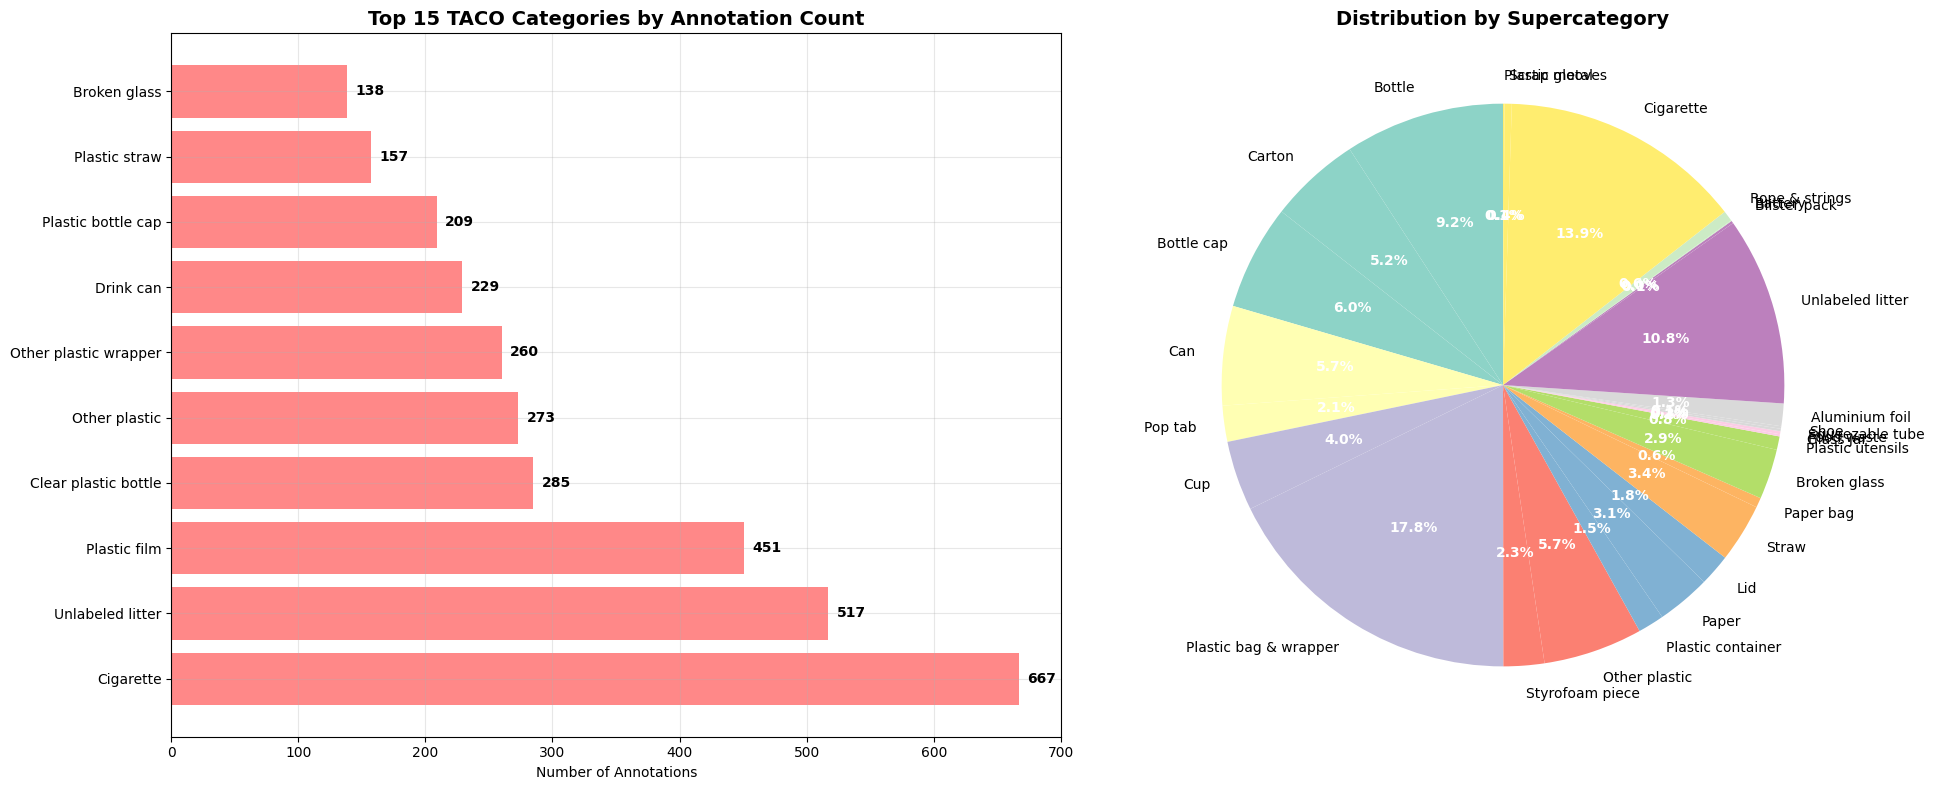

📊 Creating TACO Figure 2: Category Statistics Overview


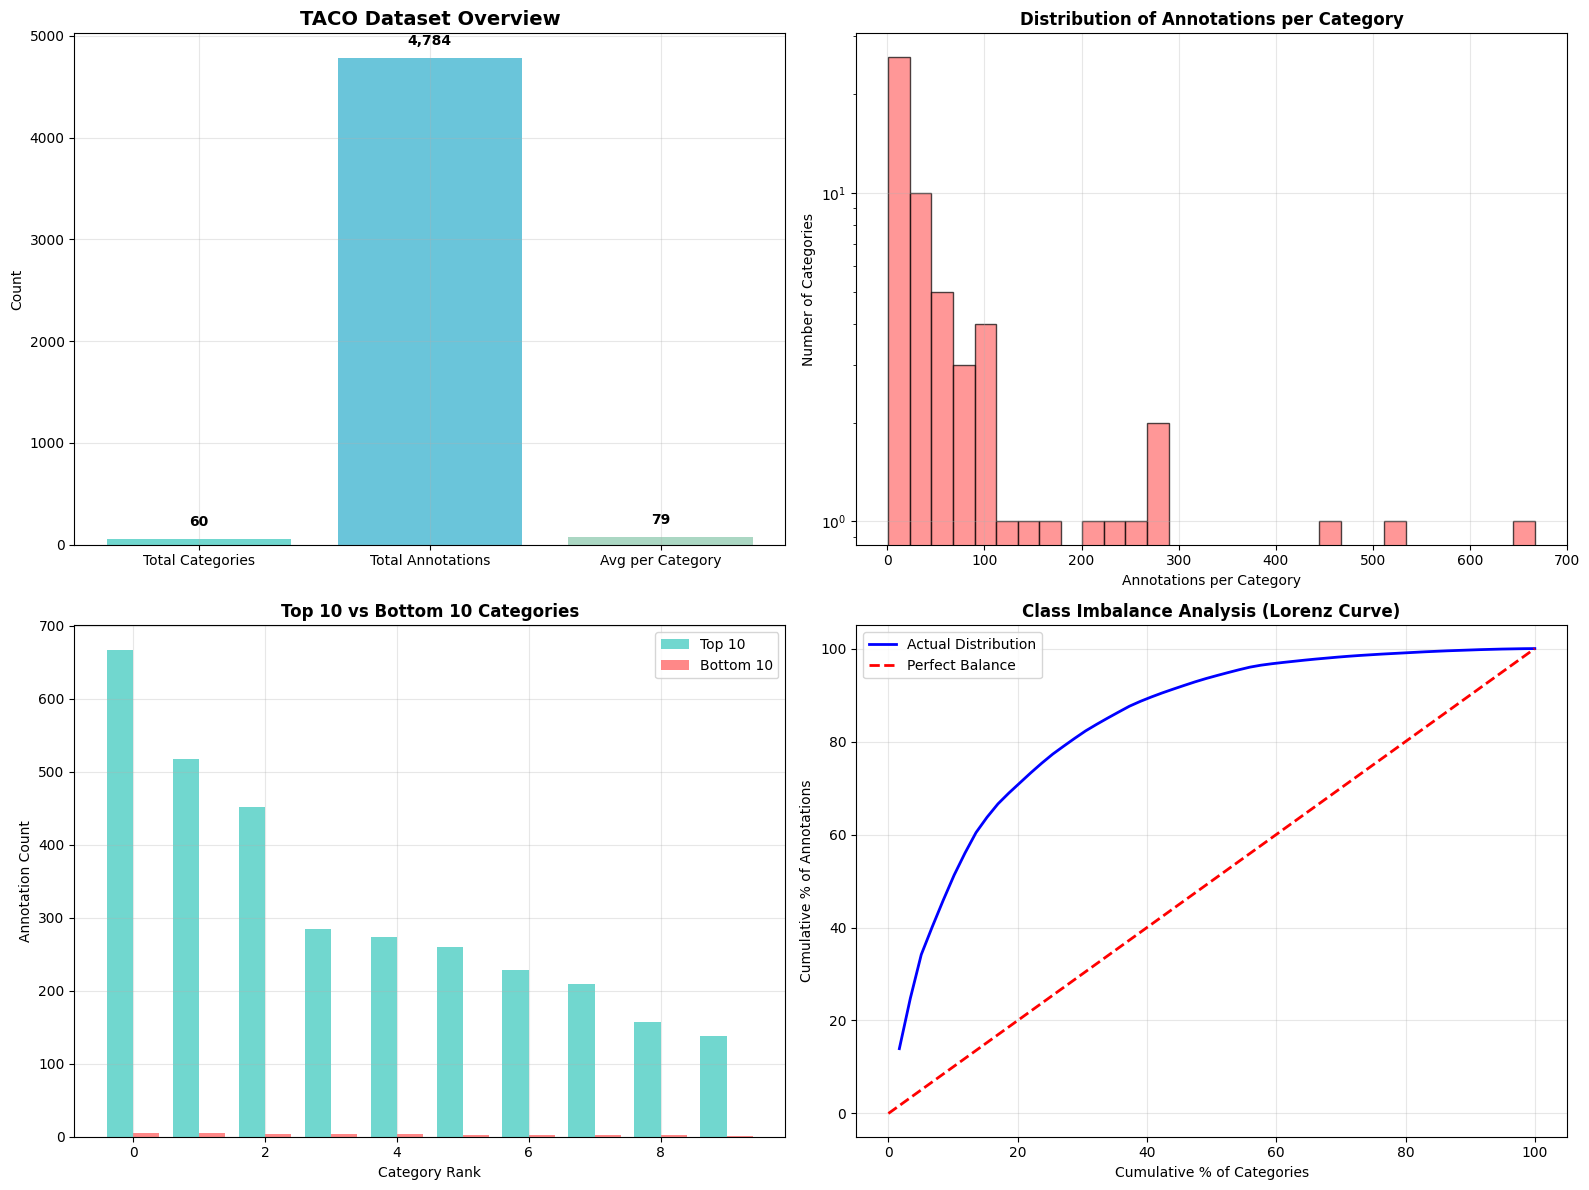

📊 Creating annotation property visualizations...
📊 Creating TACO Figure 3: Annotation Properties


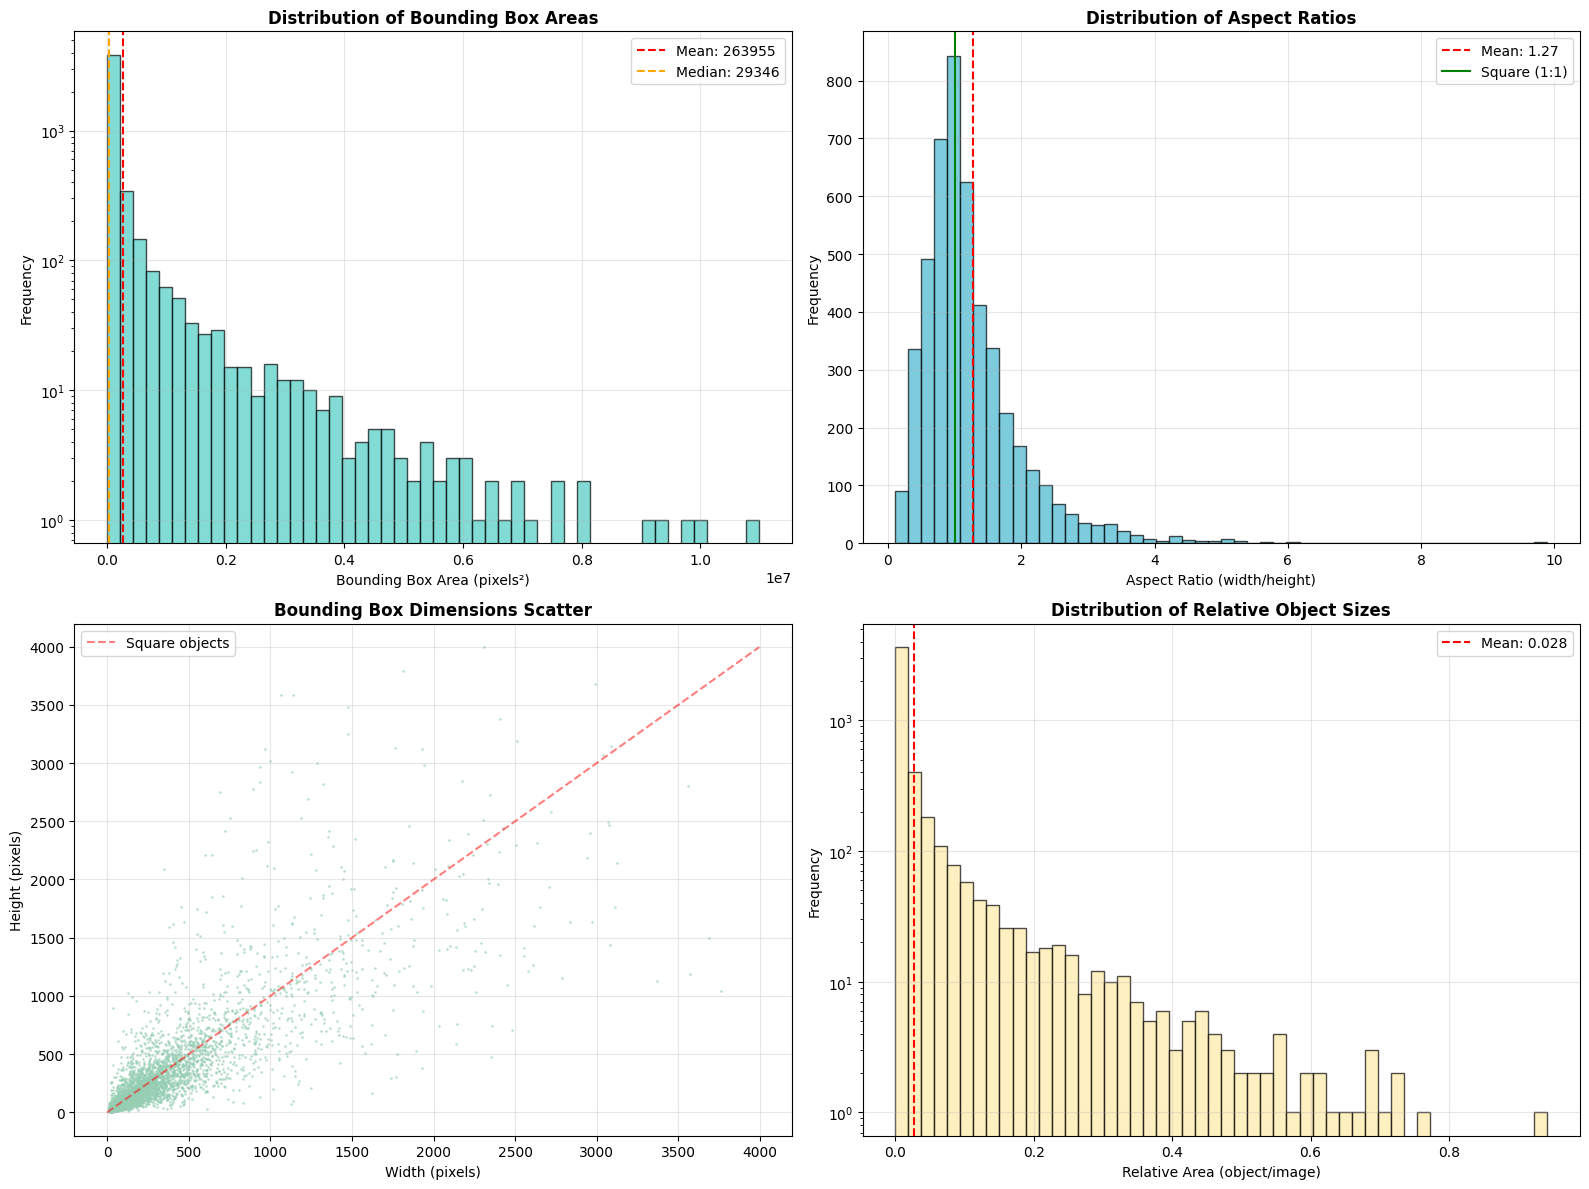

📊 Creating image analysis visualizations...
📊 Creating TACO Figure 4: Image Properties


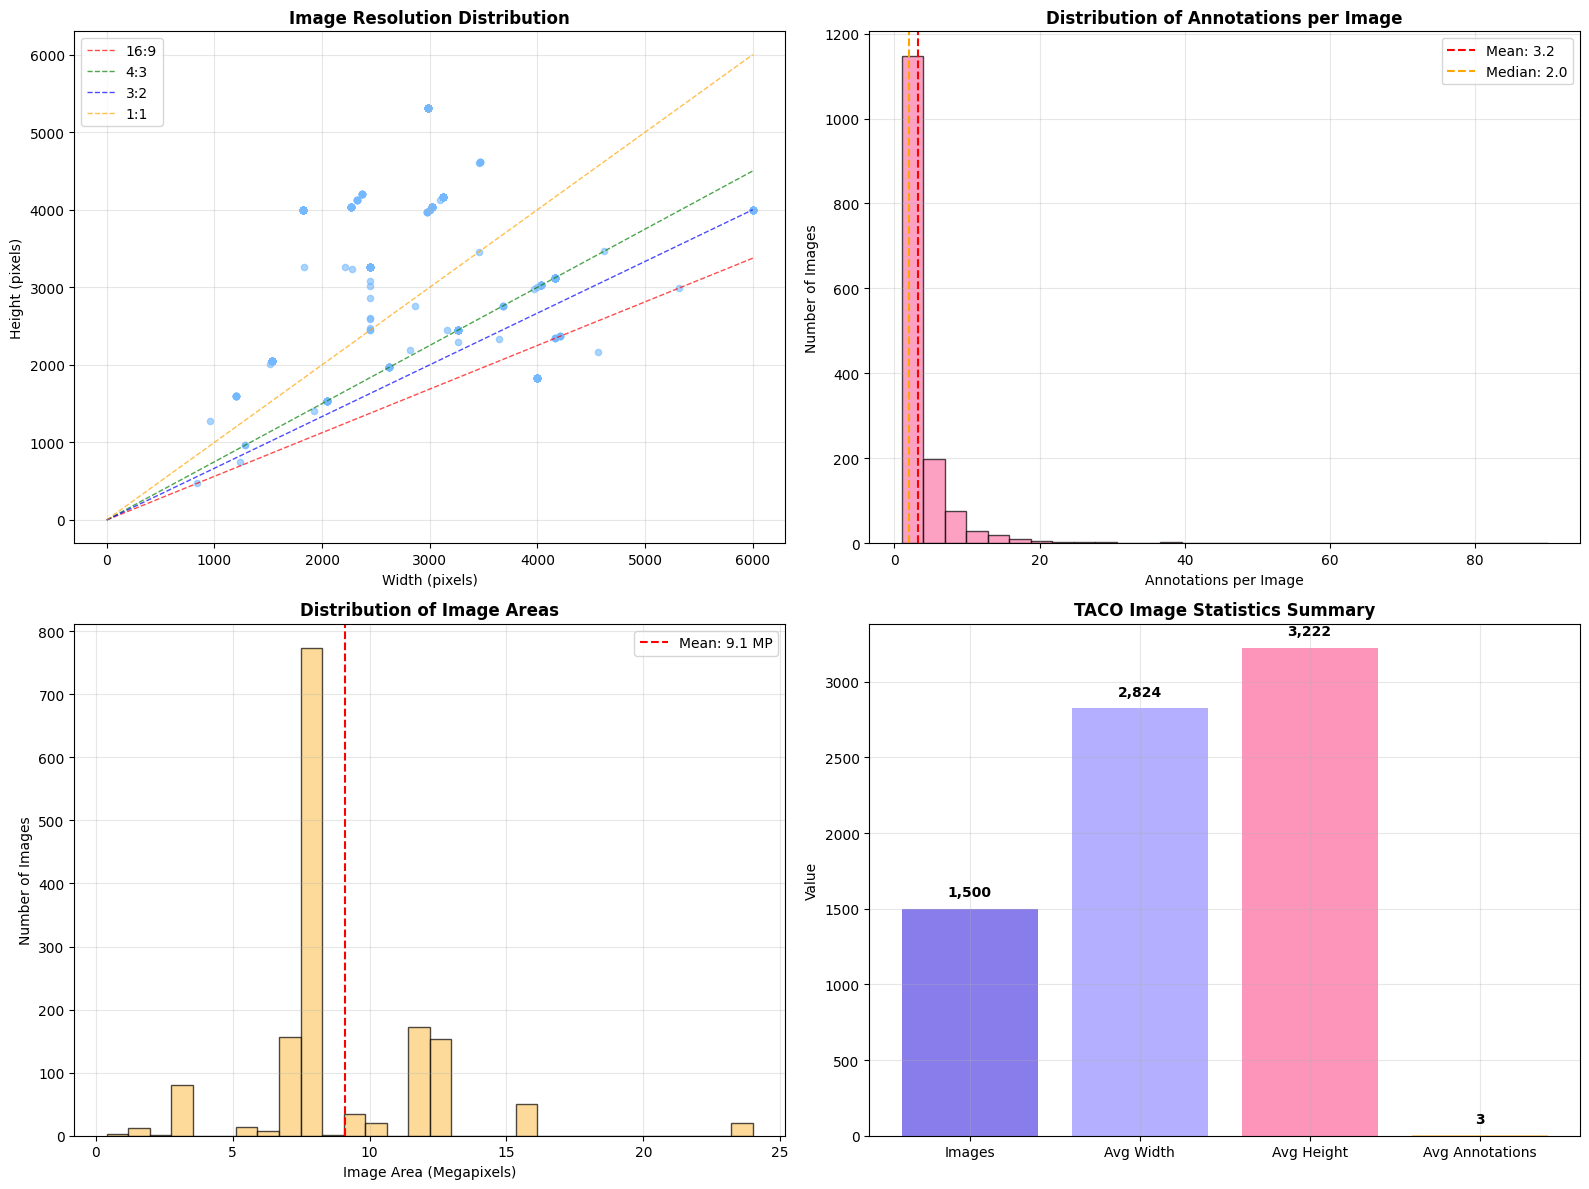

✅ Generated 4 TACO visualization sets

💾 Saving individual TACO figures...
   📁 Saved: taco_taco_categories.png & taco_taco_categories.pdf
   📁 Saved: taco_taco_category_stats.png & taco_taco_category_stats.pdf
   📁 Saved: taco_taco_annotation_properties.png & taco_taco_annotation_properties.pdf
   📁 Saved: taco_taco_image_properties.png & taco_taco_image_properties.pdf
✅ All TACO figures saved successfully!

🎯 TACO Analysis Summary:
   📊 Figures generated: 4
   💾 Files saved: 8 (PNG + PDF)
   🗂️ TACO dataset analysis complete!


In [16]:
# Generate TACO visualizations
print("🎨 Creating TACO Dataset Visualizations...")

taco_figures = {}

if taco_category_analysis:
    print("📊 Creating category visualizations...")
    category_figs = create_taco_category_visualizations(taco_category_analysis)
    taco_figures.update(category_figs)

if taco_annotation_properties:
    print("📊 Creating annotation property visualizations...")
    annotation_figs = create_taco_annotation_visualizations(taco_annotation_properties)
    taco_figures.update(annotation_figs)

if taco_image_analysis:
    print("📊 Creating image analysis visualizations...")
    image_figs = create_taco_image_visualizations(taco_image_analysis)
    taco_figures.update(image_figs)

print(f"✅ Generated {len(taco_figures)} TACO visualization sets")

# Save individual figures
if taco_figures:
    print("\n💾 Saving individual TACO figures...")
    
    for fig_name, fig in taco_figures.items():
        # Save as PNG
        png_path = f"taco_{fig_name}.png"
        fig.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white')
        
        # Save as PDF
        pdf_path = f"taco_{fig_name}.pdf"
        fig.savefig(pdf_path, bbox_inches='tight', facecolor='white')
        
        print(f"   📁 Saved: {png_path} & {pdf_path}")
    
    print(f"✅ All TACO figures saved successfully!")

# Add TACO figures to the overall figures dictionary
if 'figures' not in locals():
    figures = {}
figures.update(taco_figures)

print("\n🎯 TACO Analysis Summary:")
print(f"   📊 Figures generated: {len(taco_figures)}")
print(f"   💾 Files saved: {len(taco_figures) * 2} (PNG + PDF)")
print("   🗂️ TACO dataset analysis complete!")

# 🔄 Dataset Comparison Analysis

## Comprehensive Comparison: Roboflow vs K-Fold vs TACO

This section provides a comprehensive comparison between all analyzed datasets to understand their relative strengths and characteristics for waste detection research.

### Datasets Analyzed
1. **Roboflow Dataset**: `../../datasets/roboflow_2` - Processed YOLO format dataset
2. **K-Fold Cross-Validation**: `../../datasets/k_fold_cv` (original) and `../../datasets/k_fold_cv_balanced` (enhanced)
3. **TACO Official**: `../../datasets/taco_official/annotations.json` - Original COCO format dataset

### Comparison Metrics
- **Scale**: Total images, annotations, and dataset size
- **Class Distribution**: Balance across waste categories
- **Quality Scores**: Comprehensive quality assessment
- **Format Compatibility**: Annotation formats and structure
- **Use Case Suitability**: Best applications for each dataset

In [ ]:
# =====================================================
# DATASET COMPARISON ANALYSIS
# =====================================================

def create_dataset_comparison_visualization():
    """Create comprehensive comparison between all datasets."""
    
    print("🔄 Creating Dataset Comparison Visualization...")
    
    # Collect data from all analyses
    datasets_info = {}
    
    # Roboflow dataset info
    if 'stats' in locals() and stats:
        roboflow_total = sum(stats['class_distribution'].values())
        roboflow_classes = len(stats['class_distribution'])
        roboflow_quality = quality_assessment.get('overall_score', 0) if 'quality_assessment' in locals() else 0
        roboflow_balance = min(stats['class_distribution'].values()) / max(stats['class_distribution'].values()) if stats['class_distribution'] else 0
        
        datasets_info['Roboflow'] = {
            'total_annotations': roboflow_total,
            'num_classes': roboflow_classes,
            'quality_score': roboflow_quality,
            'balance_ratio': roboflow_balance,
            'format': 'YOLO',
            'type': 'Processed'
        }
    
    # K-fold dataset info (use balanced version if available)
    if 'balanced_k_fold_stats' in locals() and balanced_k_fold_stats:
        total_k_fold = 0
        total_classes = 0
        balance_ratios = []
        
        for fold, fold_stats in balanced_k_fold_stats.items():
            if len(fold_stats) >= 3:
                fold_total = fold_stats[2]
                total_k_fold += sum(fold_total.values())
                total_classes = len(fold_total)
                if fold_total.values():
                    balance_ratios.append(min(fold_total.values()) / max(fold_total.values()))
        
        avg_balance = np.mean(balance_ratios) if balance_ratios else 0
        avg_improvement = np.mean([item['Improvement %'] for item in k_fold_comparison]) if 'k_fold_comparison' in locals() and k_fold_comparison else 0
        
        datasets_info['K-Fold Enhanced'] = {
            'total_annotations': total_k_fold,
            'num_classes': total_classes,
            'quality_score': 75 + avg_improvement/10,  # Estimated based on improvement
            'balance_ratio': avg_balance,
            'format': 'YOLO',
            'type': 'Synthetic Enhanced'
        }
    
    # TACO dataset info
    if 'taco_category_analysis' in locals() and taco_category_analysis:
        taco_total = taco_category_analysis['total_annotations']
        taco_classes = taco_category_analysis['num_categories']
        taco_quality = taco_quality_score if 'taco_quality_score' in locals() else 0
        
        # Calculate TACO balance ratio
        category_counts = list(taco_category_analysis['category_counts'].values())
        taco_balance = min(category_counts) / max(category_counts) if category_counts else 0
        
        datasets_info['TACO Official'] = {
            'total_annotations': taco_total,
            'num_classes': taco_classes,
            'quality_score': taco_quality,
            'balance_ratio': taco_balance,
            'format': 'COCO',
            'type': 'Original'
        }
    
    if not datasets_info:
        print("❌ No dataset information available for comparison")
        return None
    
    # Create comparison visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    datasets = list(datasets_info.keys())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1'][:len(datasets)]
    
    # 1. Total annotations comparison
    annotations = [datasets_info[ds]['total_annotations'] for ds in datasets]
    bars1 = ax1.bar(datasets, annotations, color=colors, alpha=0.8)
    ax1.set_ylabel('Total Annotations')
    ax1.set_title('Dataset Scale Comparison', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    for i, v in enumerate(annotations):
        ax1.text(i, v + max(annotations)*0.02, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Number of classes comparison
    classes = [datasets_info[ds]['num_classes'] for ds in datasets]
    bars2 = ax2.bar(datasets, classes, color=colors, alpha=0.8)
    ax2.set_ylabel('Number of Classes')
    ax2.set_title('Class Diversity Comparison', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    for i, v in enumerate(classes):
        ax2.text(i, v + max(classes)*0.02, f'{v}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Quality scores comparison
    quality_scores = [datasets_info[ds]['quality_score'] for ds in datasets]
    bars3 = ax3.bar(datasets, quality_scores, color=colors, alpha=0.8)
    ax3.set_ylabel('Quality Score (0-100)')
    ax3.set_title('Dataset Quality Comparison', fontsize=14, fontweight='bold')
    ax3.set_ylim(0, 100)
    ax3.grid(True, alpha=0.3)
    
    for i, v in enumerate(quality_scores):
        ax3.text(i, v + 2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Class balance comparison
    balance_ratios = [datasets_info[ds]['balance_ratio'] for ds in datasets]
    bars4 = ax4.bar(datasets, balance_ratios, color=colors, alpha=0.8)
    ax4.set_ylabel('Balance Ratio (min/max)')
    ax4.set_title('Class Balance Comparison', fontsize=14, fontweight='bold')
    ax4.set_ylim(0, 1)
    ax4.grid(True, alpha=0.3)
    
    for i, v in enumerate(balance_ratios):
        ax4.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle('Comprehensive Dataset Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    return fig, datasets_info

def print_dataset_comparison_summary(datasets_info):
    """Print detailed comparison summary."""
    
    print("\n" + "=" * 80)
    print("📊 COMPREHENSIVE DATASET COMPARISON")
    print("=" * 80)
    
    if not datasets_info:
        print("❌ No dataset information available")
        return
    
    # Print comparison table
    print("\n📋 Dataset Overview:")
    print("-" * 80)
    print(f"{'Dataset':<20} {'Annotations':<12} {'Classes':<8} {'Quality':<8} {'Balance':<8} {'Format':<6}")
    print("-" * 80)
    
    for ds_name, info in datasets_info.items():
        print(f"{ds_name:<20} {info['total_annotations']:<12,} {info['num_classes']:<8} "
              f"{info['quality_score']:<8.1f} {info['balance_ratio']:<8.3f} {info['format']:<6}")
    
    # Analysis and recommendations
    print("\n🎯 Analysis & Recommendations:")
    print("-" * 50)
    
    # Find best in each category
    best_scale = max(datasets_info.items(), key=lambda x: x[1]['total_annotations'])
    best_quality = max(datasets_info.items(), key=lambda x: x[1]['quality_score'])
    best_balance = max(datasets_info.items(), key=lambda x: x[1]['balance_ratio'])
    most_diverse = max(datasets_info.items(), key=lambda x: x[1]['num_classes'])
    
    print(f"🏆 Largest Scale: {best_scale[0]} ({best_scale[1]['total_annotations']:,} annotations)")
    print(f"🏆 Highest Quality: {best_quality[0]} (Score: {best_quality[1]['quality_score']:.1f})")
    print(f"🏆 Best Balance: {best_balance[0]} (Ratio: {best_balance[1]['balance_ratio']:.3f})")
    print(f"🏆 Most Diverse: {most_diverse[0]} ({most_diverse[1]['num_classes']} classes)")
    
    print("\n💡 Use Case Recommendations:")
    print("-" * 30)
    
    for ds_name, info in datasets_info.items():
        print(f"\n{ds_name}:")
        
        if info['type'] == 'Original':
            print("   ✅ Best for: Research baselines, benchmarking")
            print("   ✅ Strengths: Large scale, diverse categories")
        elif info['type'] == 'Processed':
            print("   ✅ Best for: Quick model training, prototyping")
            print("   ✅ Strengths: Ready-to-use format, good quality")
        elif info['type'] == 'Synthetic Enhanced':
            print("   ✅ Best for: Robust model training, class balance")
            print("   ✅ Strengths: Enhanced balance, cross-validation ready")
        
        if info['quality_score'] >= 80:
            print("   🌟 High quality dataset")
        elif info['quality_score'] >= 60:
            print("   ⭐ Good quality dataset")
        else:
            print("   ⚠️ Consider improvements needed")

# Execute comparison analysis
comparison_fig, comparison_data = create_dataset_comparison_visualization()
print_dataset_comparison_summary(comparison_data)

if comparison_fig:
    # Save comparison figure
    comparison_fig.savefig('dataset_comprehensive_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
    comparison_fig.savefig('dataset_comprehensive_comparison.pdf', bbox_inches='tight', facecolor='white')
    print(f"\n💾 Saved comparison visualization: dataset_comprehensive_comparison.png & .pdf")
    
    plt.show()
    
    # Add to figures collection
    if 'figures' not in locals():
        figures = {}
    figures['dataset_comparison'] = comparison_fig

print("\n✅ Dataset comparison analysis complete!")